<a href="https://colab.research.google.com/github/krishchat/Customer-Churn-Predictor/blob/main/Credit_Card_Customer_Churn_Prediction_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Customer Churn Prediction Engine

###  Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance







### Objective


1. Explore and visualize the dataset.


2. Build a classification model to predict if the customer is going to churn or not


3. Optimize the model using appropriate techniques


4. Generate a set of insights and recommendations that will help the bank


### Data Dictionary:








<b>CLIENTNUM:</b> Client number. Unique identifier for the customer holding the account


<b>Attrition_Flag:</b> Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"

<b>Customer_Age:</b> Age in Years


<b>Gender:</b> Gender of the account holder


<b>Dependent_count:</b> Number of dependents


<b>Education_Level:</b>  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.


<b>Marital_Status:</b> Marital Status of the account holder


<b>Income_Category:</b> Annual Income Category of the account holder


<b>Card_Category:</b> Type of Card


<b>Months_on_book:</b> Period of relationship with the bank


<b>Total_Relationship_Count:</b> Total no. of products held by the customer


<b>Months_Inactive_12_mon:</b> No. of months inactive in the last 12 months


<b>Contacts_Count_12_mon:</b> No. of Contacts between the customer and bank in the last 12 months


<b>Credit_Limit:</b> Credit Limit on the Credit Card


<b>Total_Revolving_Bal:</b> The balance that carries over from one month to the next is the revolving balance


<b>Avg_Open_To_Buy:</b> Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)


<b>Total_Trans_Amt:</b> Total Transaction Amount (Last 12 months)


<b>Total_Trans_Ct:</b> Total Transaction Count (Last 12 months)


<b>Total_Ct_Chng_Q4_Q1:</b> Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter


<b>Total_Amt_Chng_Q4_Q1:</b> Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter


<b>Avg_Utilization_Ratio:</b> Represents how much of the available credit the customer spent

.

.


.

.

### Importing all required Libraries:

##### Installing imblearn package

In [ ]:
! pip install imblearn

<IPython.core.display.Javascript object>

In [ ]:
# For reading and manipulating data
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To display the plot here
%matplotlib inline

# to restrict the float value to 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# to show all columns in the dataset
pd.set_option("display.max_columns", None)


# to perform scaling of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build Logistic Regression model
from sklearn.linear_model import LogisticRegression

# to build decision tree classifier model
from sklearn.tree import DecisionTreeClassifier


# to build Bagging classifier model
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# to build Boosting Classifier Models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# to check model performance
from sklearn import metrics

# model metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# importing Tree to Plot Decision Tree
from sklearn import tree

# importing gridsearchcv to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# importing libraries to perform k-fold cross validatipon
from sklearn.model_selection import StratifiedKFold, cross_val_score


# To impute missing values
from sklearn.impute import KNNImputer, SimpleImputer

# To bin continuous data into intervals
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder


# To make a model pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# To oversample and undersample data

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")


%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Loading and exploring the data

In [ ]:
# Loading the Data Dictionary into a DataFrame for future reference

df = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [ ]:
# Backing up the DataFrame for future use

df_bkup = df.copy()

<IPython.core.display.Javascript object>

In [ ]:
# Checking shape of data

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 10127 rows and 21 columns in the dataset


<IPython.core.display.Javascript object>

##### There are 10127 rows and 21 columns in the dataset

In [ ]:
# Checking out the loaded DataFrame

np.random.seed(1)
df.sample(n=10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,712389108,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,6,3,2,2570.00,2107,463.00,0.65,4058,83,0.77,0.82
9013,718388733,Existing Customer,38,F,1,College,NaN,Less than $40K,Blue,32,2,3,3,2609.00,1259,1350.00,0.87,8677,96,0.63,0.48
2053,710109633,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,6,3,2,9871.00,1061,8810.00,0.55,1683,34,0.48,0.11
3211,717331758,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,6,3,4,34516.00,2517,31999.00,0.77,4228,83,0.60,0.07
5559,709460883,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,5,2,4,1614.00,0,1614.00,0.61,2437,46,0.44,0.00
6106,789105183,Existing Customer,54,M,3,Post-Graduate,Single,$80K - $120K,Silver,42,3,1,2,34516.00,2488,32028.00,0.55,4401,87,0.78,0.07
4150,771342183,Attrited Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,40,6,3,2,1625.00,0,1625.00,0.69,2314,43,0.43,0.00
2205,708174708,Existing Customer,38,M,4,Graduate,Married,$40K - $60K,Blue,27,6,2,4,5535.00,1276,4259.00,0.64,1764,38,0.90,0.23
4145,718076733,Existing Customer,43,M,1,Graduate,Single,$60K - $80K,Silver,31,4,3,3,25824.00,1170,24654.00,0.68,3101,73,0.78,0.04
5324,821889858,Attrited Customer,50,F,1,Doctorate,Single,abc,Blue,46,6,4,3,1970.00,1477,493.00,0.66,2493,44,0.57,0.75


<IPython.core.display.Javascript object>

In [ ]:
# Check the Datatypes and Information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

#### Checking Missing Values

In [ ]:
# Exploring Missing Values

missing_df = pd.DataFrame(
    {
        "Missing": df.isnull().sum(),
        "Missing %": round((df.isnull().sum() / df.isna().count() * 100), 2),
    }
)

display(missing_df.sort_values(by="Missing", ascending=False))

,Missing,Missing %
Education_Level,1519,15.00
Marital_Status,749,7.40
CLIENTNUM,0,0.00
Contacts_Count_12_mon,0,0.00
Total_Ct_Chng_Q4_Q1,0,0.00
Total_Trans_Ct,0,0.00
Total_Trans_Amt,0,0.00
Total_Amt_Chng_Q4_Q1,0,0.00
Avg_Open_To_Buy,0,0.00
Total_Revolving_Bal,0,0.00


<IPython.core.display.Javascript object>

In [ ]:
# Checking if the dataset has any duplicate records

df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [ ]:
# Viewing Statistics of DataSet

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


<IPython.core.display.Javascript object>

### Observation from given dataset

1. There are 10127 records and 21 features in the dataset.


2. There are no duplicate records.


3. Our target variable will be `Attrition_Flag`.


4. `Education_Level` has 15% and `Marital_Status` has 7.4% <b>Missing values</b>.


5. Average `Customer_Age` is 46, Minimum is 26 and Maximum is 73.


6. Average `Customer Relationship with Bank` is nearly 3 years with a minimum of just over a year and maximum of nearly 5 years (56 months)


7. On an average `Customers hold nearly 4 products`


8. Mean `Credit_limit` 8631 while median is `4549` , indicates some Customers might have very high Credit Limits.


9. `Total_Trans_Amt` has an average of 4404 and median of 3899. This indicate data is right skewed with outliers on higher end.


10. On an Average Customers have more transactions in first Quarter as compared to fourth Quarter. Ratio of transaction count between `Q4 : Q1 is 7 : 10`


11. 75% of the customers only consumes 75% of their `Credit Limit` with an average of just 27%

### Exploring Data

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


<IPython.core.display.Javascript object>

##### Deleting CLIENTNUM

In [ ]:
# CLIENTNUM is unique for each candidate and might not add value to modeling

df.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

###### Converting following Columns into Categorical

In [ ]:
# Converting following columns into Categorical

nonCatCols = list(df.select_dtypes(include="object").columns) + [
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

for col in nonCatCols:
    df[col] = df[col].astype("category")

<IPython.core.display.Javascript object>

###### Looping thru the Categorical Features and exploring each category count

In [ ]:
for catCols in df.select_dtypes(include="category").columns:
    print(f"Feature: {catCols}")
    print("~" * 50)
    display(
        pd.DataFrame({"Counts": df[catCols].value_counts(dropna=False)}).sort_values(
            by="Counts", ascending=False
        )
    )

Feature: Attrition_Flag
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
Existing Customer,8500
Attrited Customer,1627


Feature: Gender
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
F,5358
M,4769


Feature: Dependent_count
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
3,2732
2,2655
1,1838
4,1574
0,904
5,424


Feature: Education_Level
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
Graduate,3128
High School,2013
NaN,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


Feature: Marital_Status
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
Married,4687
Single,3943
NaN,749
Divorced,748


Feature: Income_Category
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
abc,1112
$120K +,727


Feature: Card_Category
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
Blue,9436
Silver,555
Gold,116
Platinum,20


Feature: Total_Relationship_Count
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
3,2305
4,1912
5,1891
6,1866
2,1243
1,910


Feature: Months_Inactive_12_mon
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
3,3846
2,3282
1,2233
4,435
5,178
6,124
0,29


Feature: Contacts_Count_12_mon
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Counts
3,3380
2,3227
1,1499
4,1392
0,399
5,176
6,54


<IPython.core.display.Javascript object>

In [ ]:
# Summarizing Categorical Features

df.describe(include=["category"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Dependent_count,10127,6,3,2732
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436
Total_Relationship_Count,10127,6,3,2305
Months_Inactive_12_mon,10127,7,3,3846
Contacts_Count_12_mon,10127,7,3,3380


<IPython.core.display.Javascript object>

### Observations:


1. More than 1500 records are missing Education_level and almost 750 missing in Marital_Status.



2. Income_category has more than 1000 non-numeric junk values 'abc' that needs to be Imputed.



3. Some prefix and suffix treatments need to be make on Income_category values too.



4. Most of the customers uses Blue Card.



5. Total 1627 customers attrited.



6. Most of the customers have 2 or 3 dependents.



7. Male and female customer count is very close with Females being slightly higher in number.



8. Only less than 10% of the customers uses just 1 product. Most of them holds 3 products. 

### Univariate Analysis 

##### A function to plot histogram and boxplot for each Quantitive features together

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    f2.suptitle("Disribution of " + feature, fontsize=18, fontweight="bold")

    sns.set_theme(style="white")
    sns.despine(top=True, right=True, left=True)  # to remove side line from graph

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="cividis"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="orange"
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

###### Looping thru all the Numerical Columns and plotting them sequentially

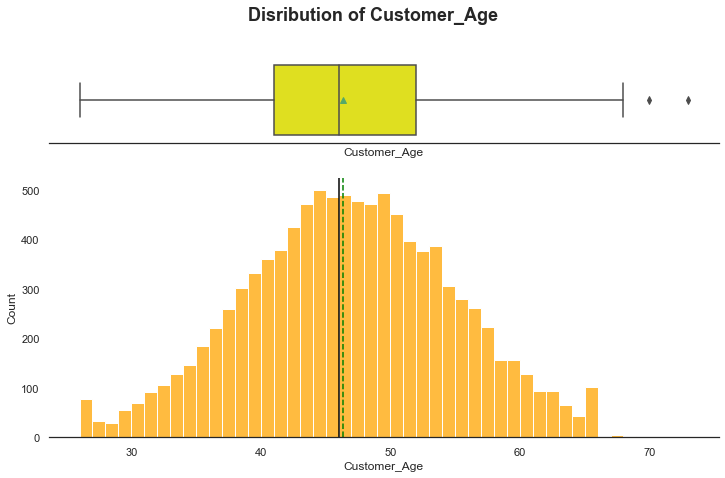

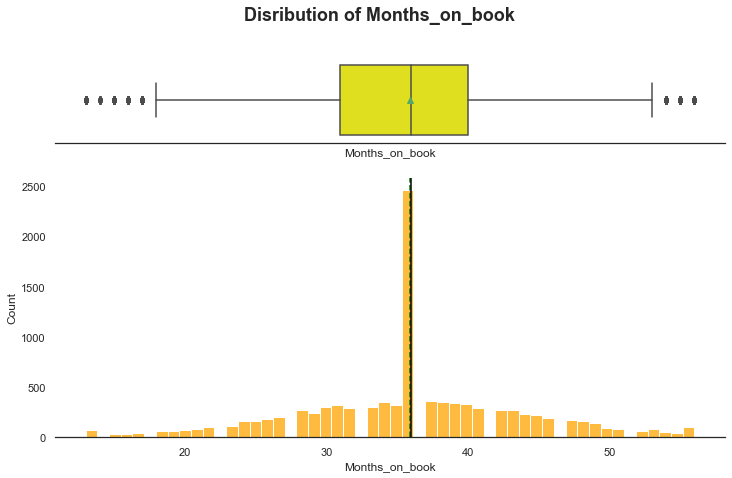

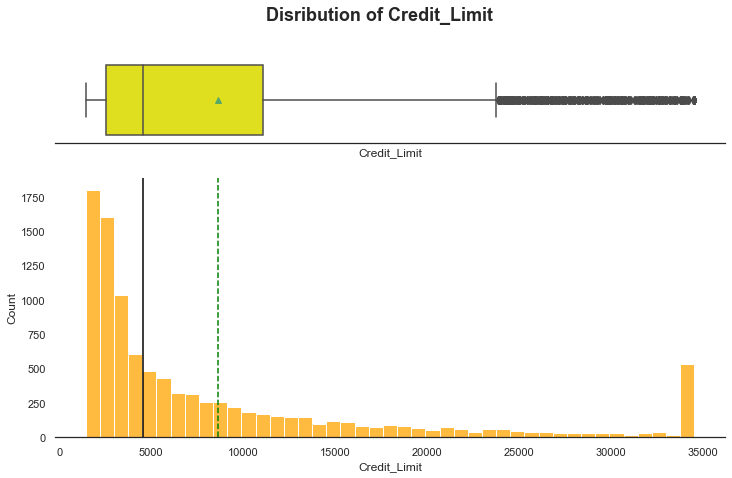

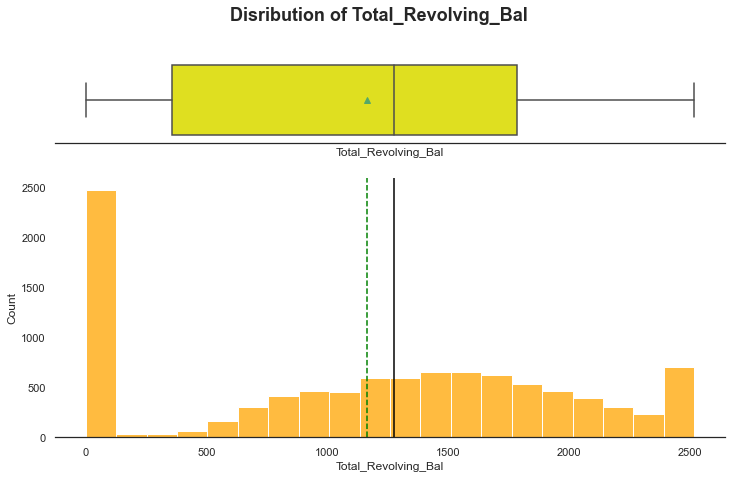

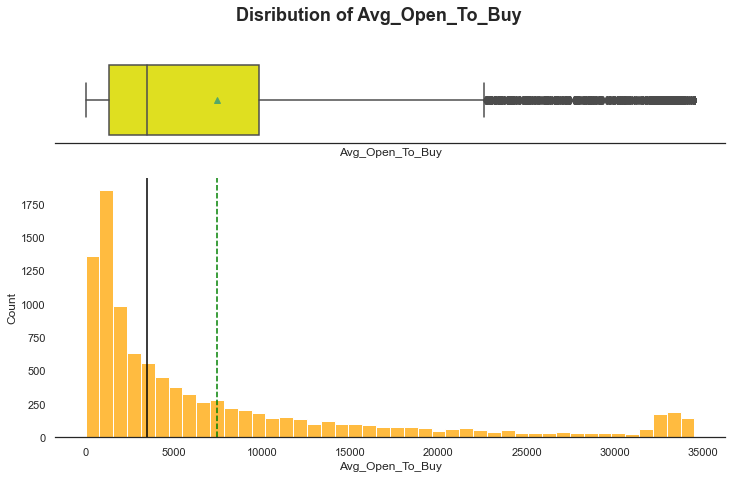

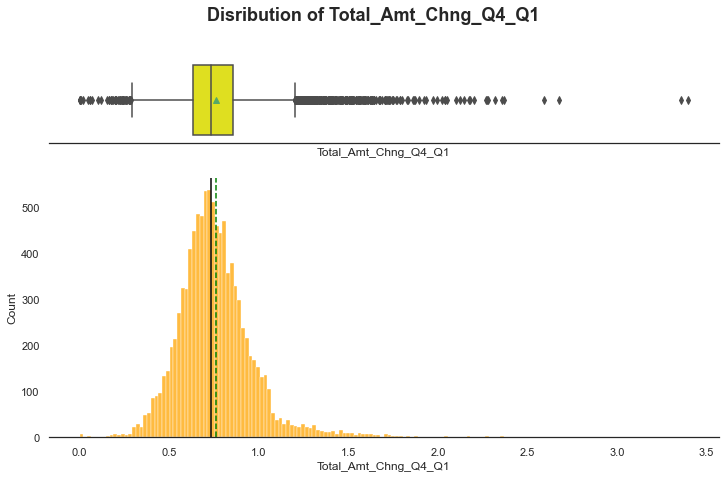

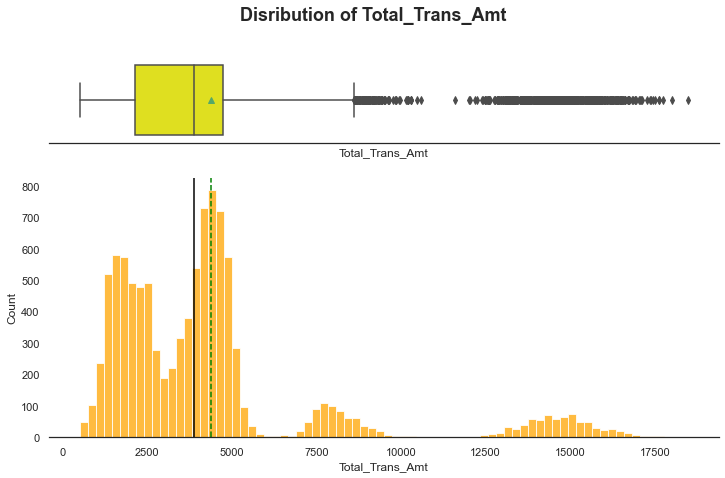

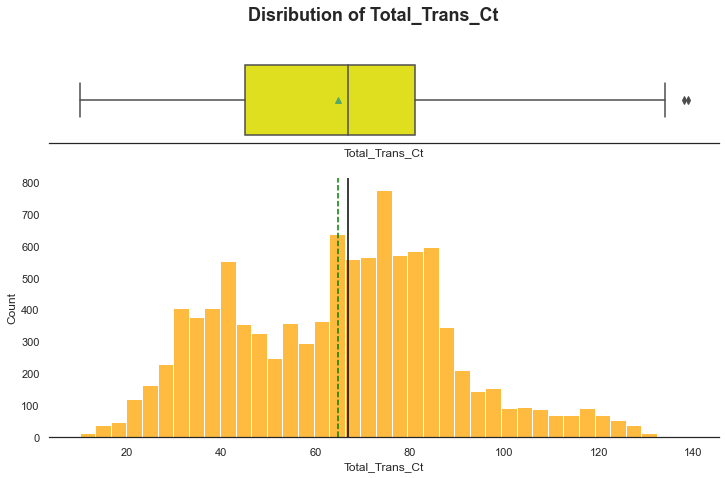

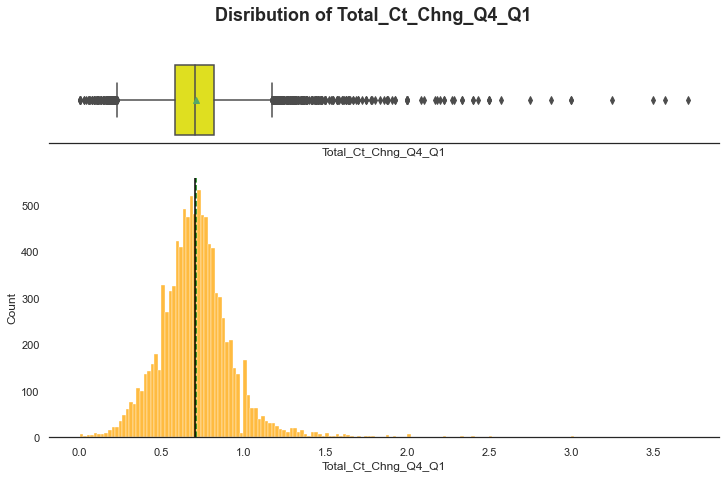

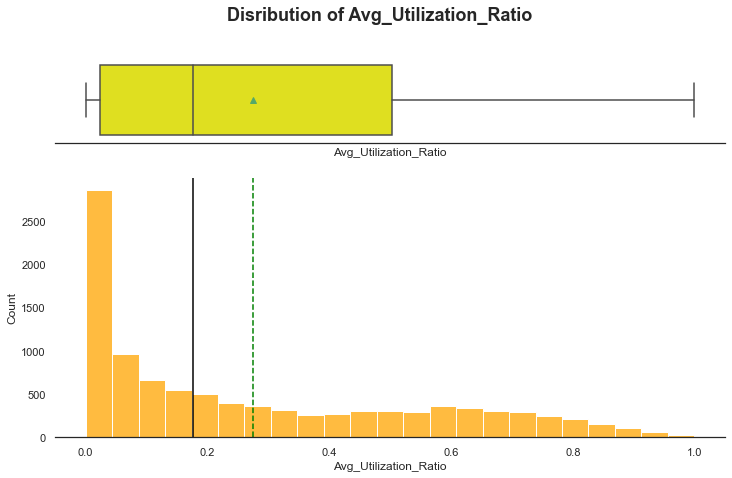

<IPython.core.display.Javascript object>

In [ ]:
# select all quantitative columns for checking the spread

numeric_cols = df.select_dtypes(include="number").columns.to_list()

for cols in numeric_cols:
    histogram_boxplot(df, cols)

#### Observations

* Customer Age is almost Normally disturbuted, with some outlier on higher end.


* Month on book has maximum distrubution around ~35-36.Most customer have credit card for this long. It has many outliers on lower and higher end.



* Credit card limit is right skewed , with a sudden pick at 35000, as seen before this is maxiumum limit and seems to be some kind of default value.There are lot of outliers on higher end.


* Many customers have a 0 revolving balance and then it follows almost normal distrubution and then sudden peak at 2500.


* Average Open to buy and Credit card limit has similar distributions.


* Total Amt change follows a Normal distribution but it has lot of outliers on both ends.


* Total Trans amt follows a Bimodal distribution before 5000, and then  there is a data spread between 7500-10000 and 12500-17500. It has lot of outliers on higher end.


* Total_trans_ct is also Bimodal with some outliers on the upper side.


* Total ct change q4_q1 has normal like disturbtion with lot of outliers on higher and lower end.


* Most of the customers are not fully using their credit limits.

### Lets analyze the Categorical data

In [ ]:
# A Function to add percentage % to the Count plots
def perc_cal(plot, feature):
    total = len(feature)  # column length
    for p in plot.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)  # class %
        x = p.get_x() + p.get_width() / 2 - 0.05  # width
        y = p.get_y() + p.get_height()  # hieght
        plot.annotate(percentage, (x, y), size=12)  # annotate %

<IPython.core.display.Javascript object>

In [ ]:
df.select_dtypes(include="category").columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon'],
      dtype='object')

<IPython.core.display.Javascript object>

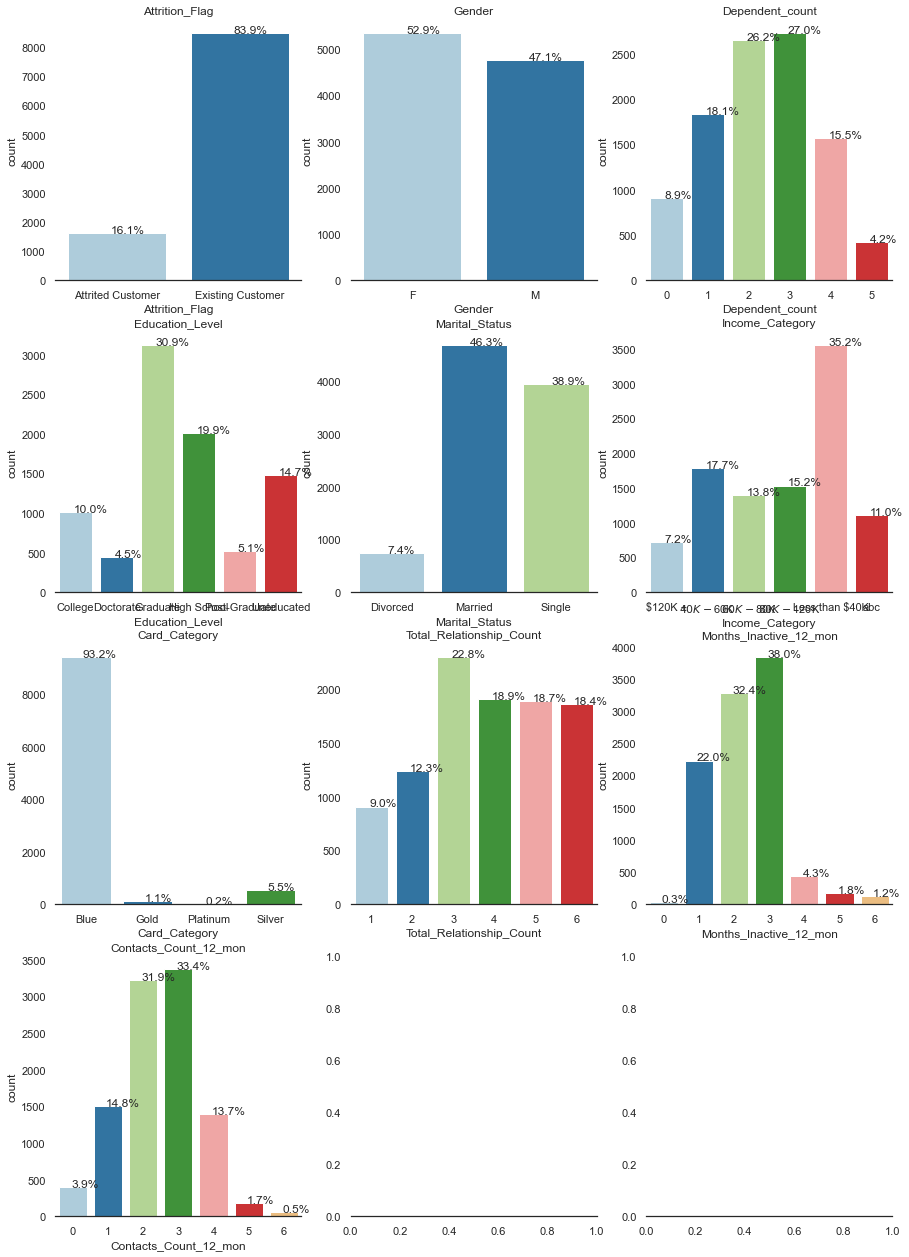

<IPython.core.display.Javascript object>

In [ ]:
# Loop thru the Categorical columns and Plotting them together

fig, axes = plt.subplots(4, 3, figsize=(15, 22))

sns.set_theme(style="white")

cat_f = list(df.select_dtypes(include="category").columns)

for i in range(len(cat_f)):
    row = i // 3
    col = i % 3
    plt_ax = axes[row, col]

    sns.despine(top=True, right=True, left=True)  # to remove side line from graph
    sns.set_palette("Paired")

    sns.countplot(data=df, x=cat_f[i], ax=plt_ax).set(title=cat_f[i])
    perc_cal(plt_ax, df[cat_f[i]])


plt.show()

#### Observations

* ~93 % have blue card. Very less customers have a plantinum card


* ~16% of credit card customers attrited.


* ~52 % are female customers who have credit cards.


* ~53% of the customers have 2-3 dependents.


* ~30 % customers are graduate. There are very few post graduate and doctorate customers.


* ~46 % are married customers.


* ~35% earn less than 40 k.


* ~22 % have 3 bank products


* ~38 % are inactive from 3 months. Customers who are inactive from 4,5,6 month should be investigated more to see if there is any relationship with attrition


* ~60 % are contacted 2-3 times in 12 month.

### Bivariate and Multivariate analysis

#### Lets plot the correlations which are - 
        
 Greater than 0.6
        
 Less than -0.1

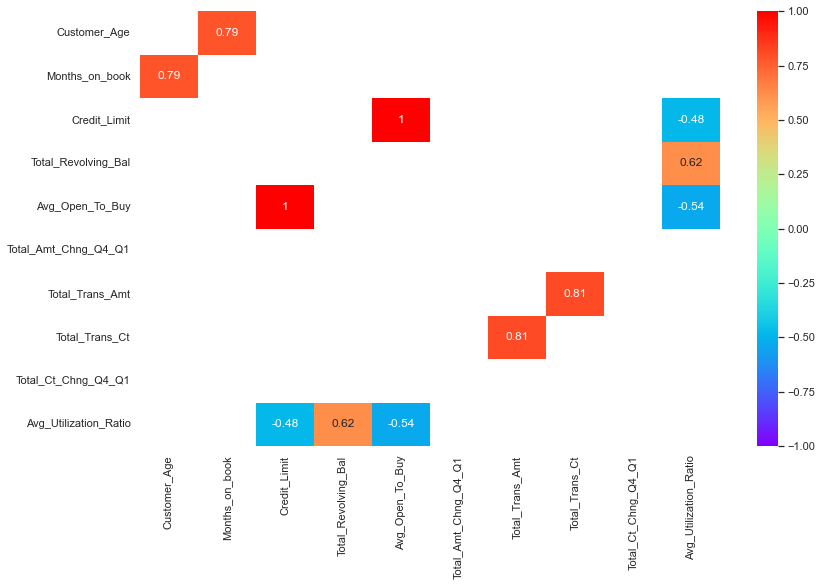

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(13, 8))

sns.heatmap(
    data=df.corr()[((df.corr() > 0.6) | (df.corr() < -0.1)) & (df.corr() != 1)],
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="rainbow",
)

plt.show()

###### Lets see how the Pairplot looks

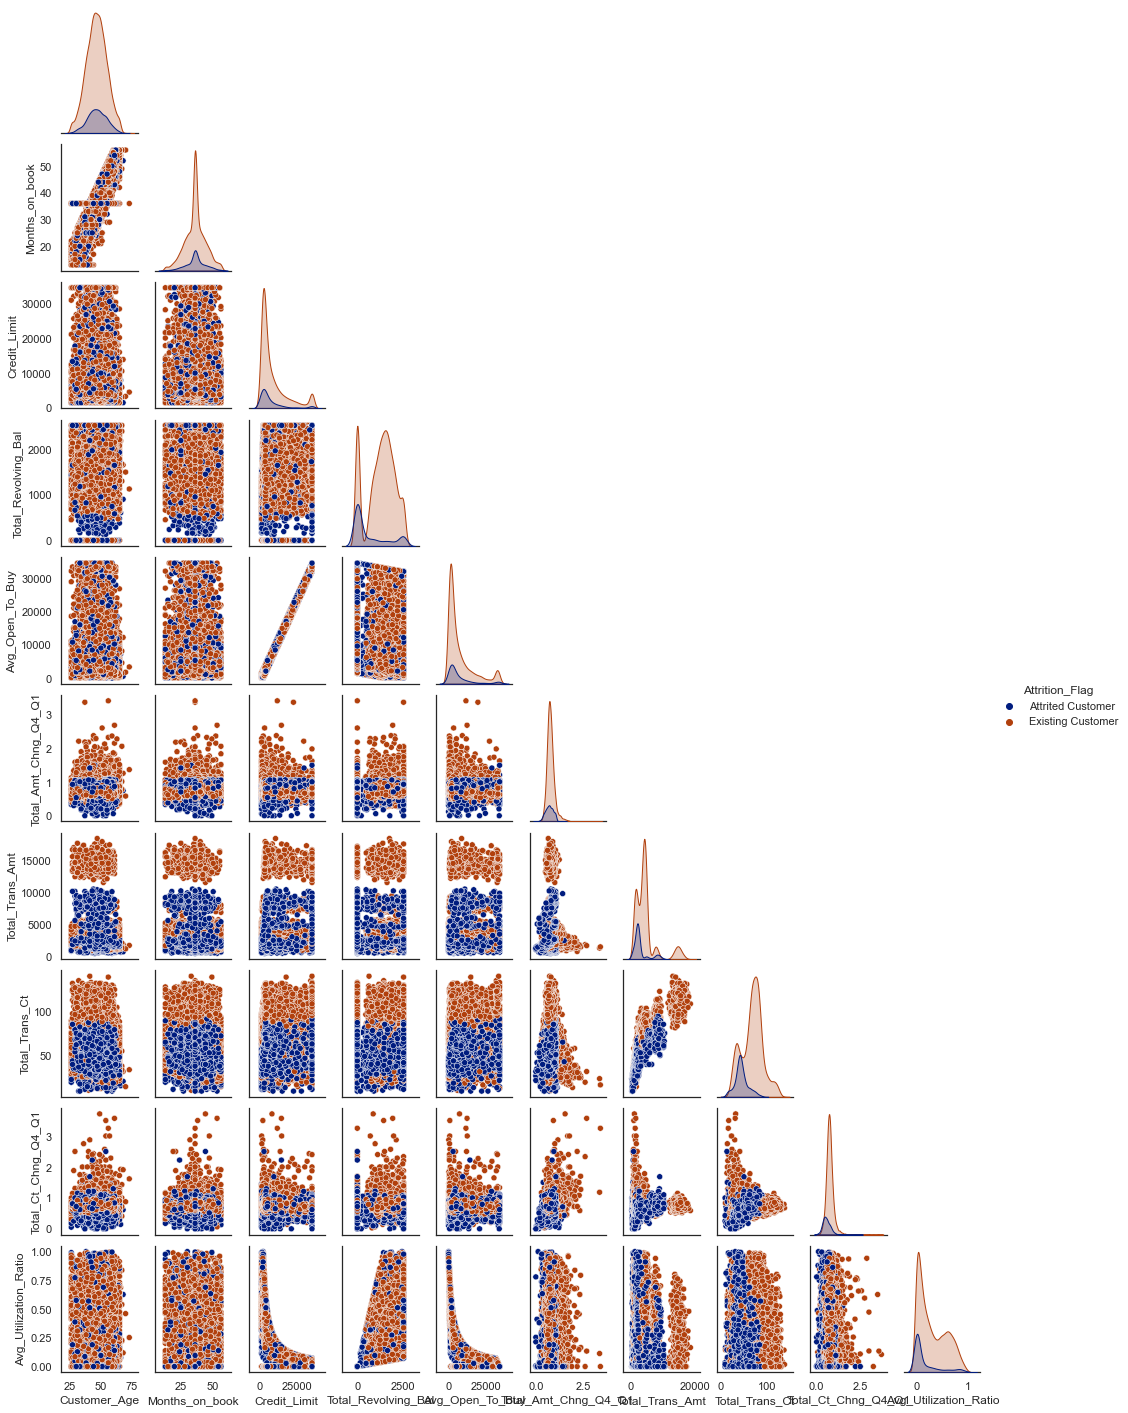

<IPython.core.display.Javascript object>

In [ ]:
sns.set_palette(sns.color_palette("dark"))
sns.pairplot(df, hue="Attrition_Flag", height=2, aspect=0.7, corner=True)
plt.show()

#### Observations

* Customers Age & Relationship with Bank are highly correlated.


* Credit Limit and Average Left to buy are fully proportional to each other. We may drop anyone of these.


* Total transaction count and total transaction amount are highly correlated which is normal.


* Customers with more Credit Limits tends to Spend less as they have weak negative correlations.


* Average Utilization also negatively correlated to average balance left to buy.


* Total revolving balance and average utlization are positively correlated.

#### Lets find out how Customer Attrition is distributed across the Features

A function to show the distribution of the target variable Attrition Yes or No based on other features

In [ ]:
### Function to plot distributions


def plot_target(data, feature):

    target = "Attrition_Flag"

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    target_uniq = data[target].unique()

    # Code to plot the Histplot
    # -------------------------------
    axs[0, 0].set_title(
        feature + " ( " + str(target_uniq[0]) + " ) ", fontsize=14, fontweight="bold",
    )
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=feature,
        kde=True,
        ax=axs[0, 0],
        color="green",
    )

    axs[0, 1].set_title(
        feature + " ( " + str(target_uniq[1]) + " ) ", fontsize=14, fontweight="bold",
    )
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=feature,
        kde=True,
        ax=axs[0, 1],
        color="grey",
    )

    # Drawing a Line between Histogram and BoxPlot
    # ---------------------------------------------
    line = plt.Line2D(
        (0.1, 0.9), (0.5, 0.5), color="blue", linewidth=2.5, linestyle="--"
    )
    fig.add_artist(line)

    # Code to plot the BoxPlot
    # -------------------------------
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=feature, ax=axs[1, 0], palette="RdYlGn")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=feature,
        ax=axs[1, 1],
        showfliers=False,
        palette="RdYlGn",
    )
    sns.despine(top=True, right=True, left=True)  # to remove side line from graph

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

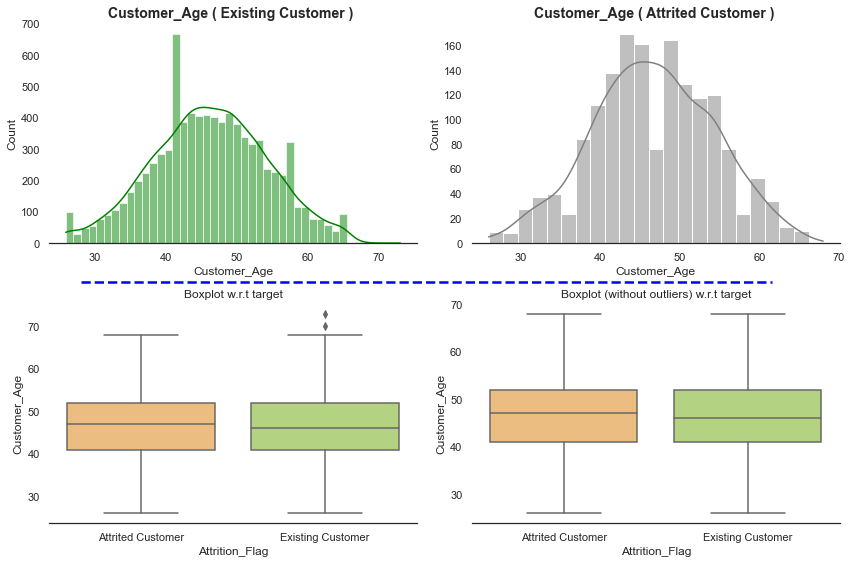

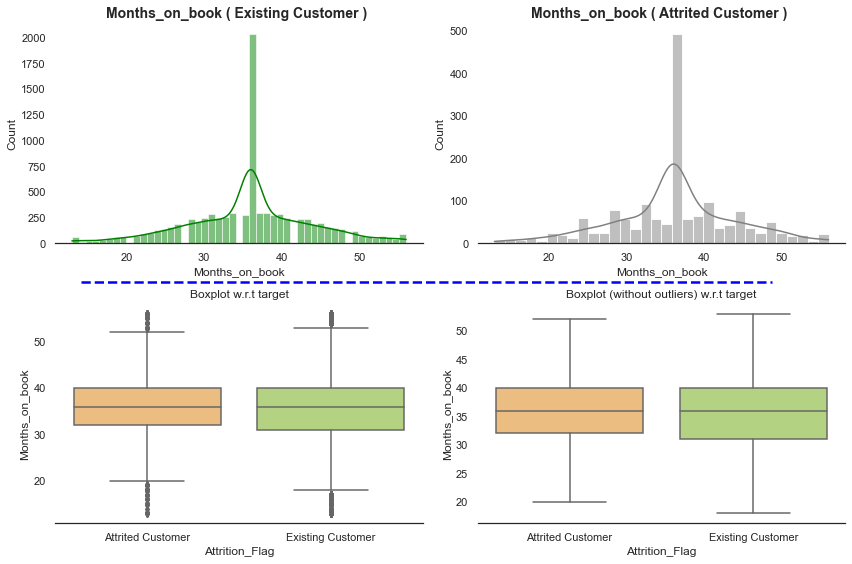

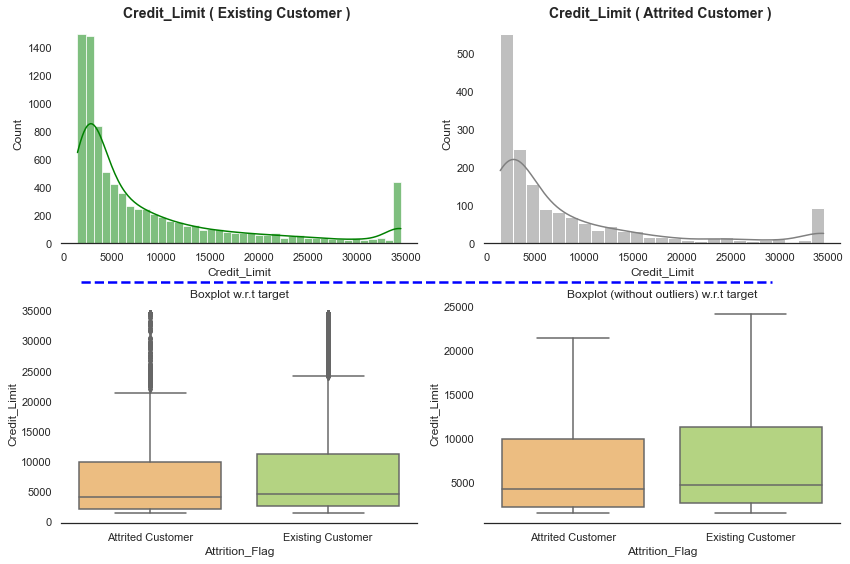

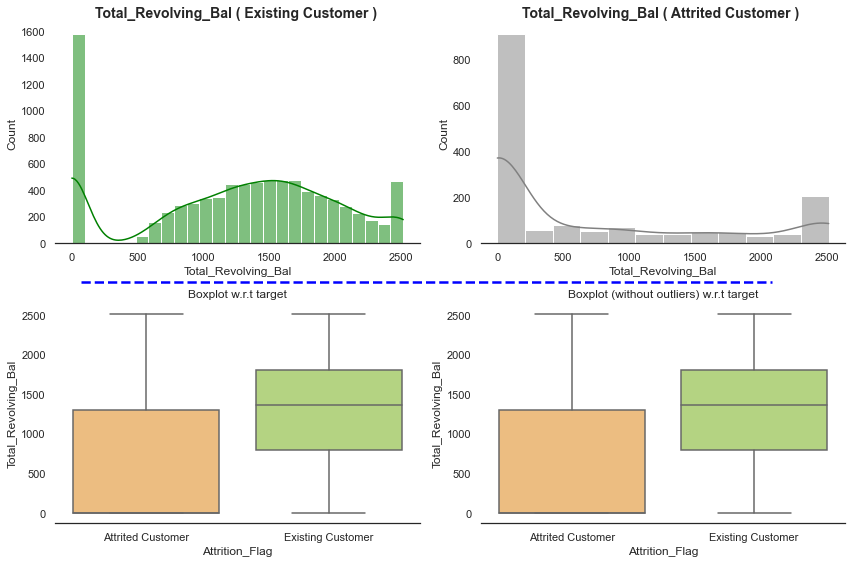

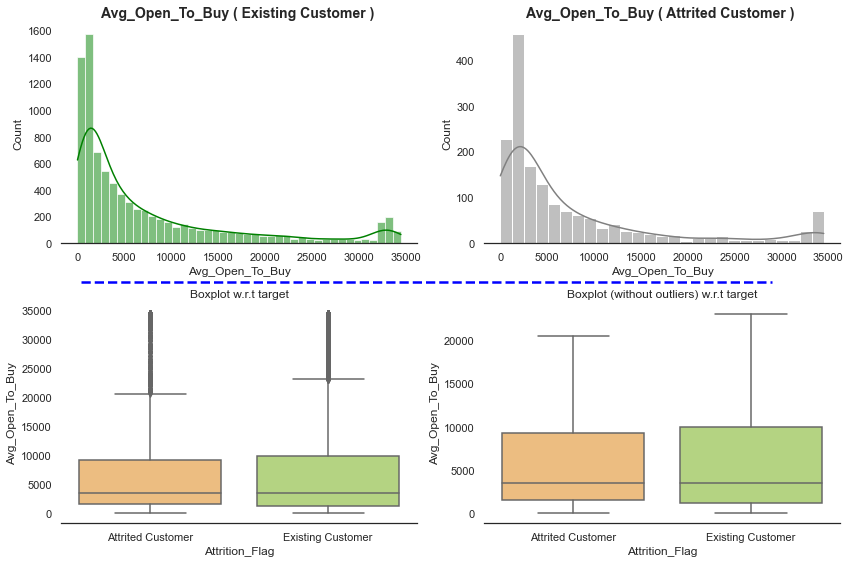

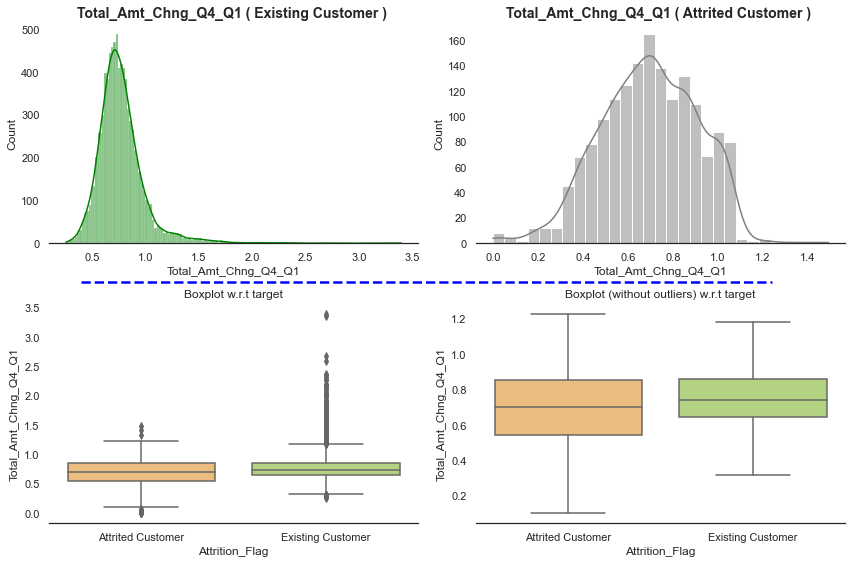

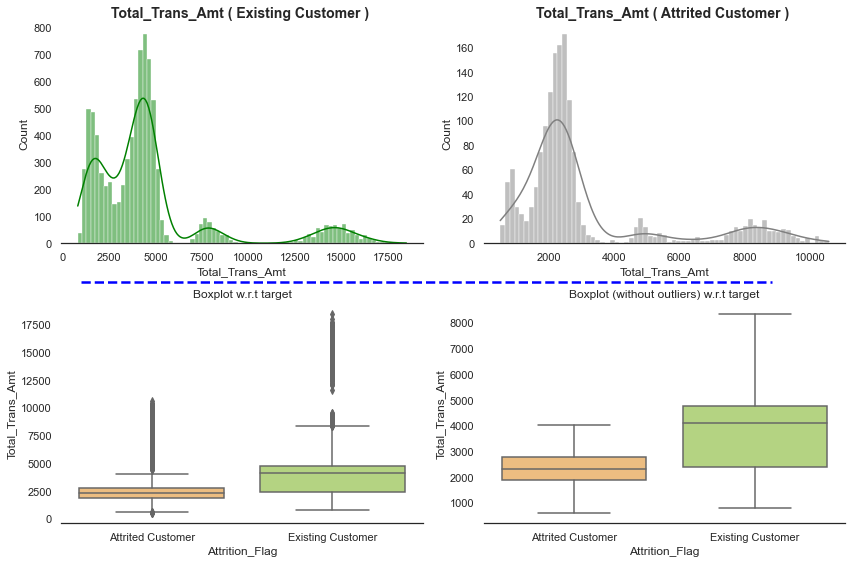

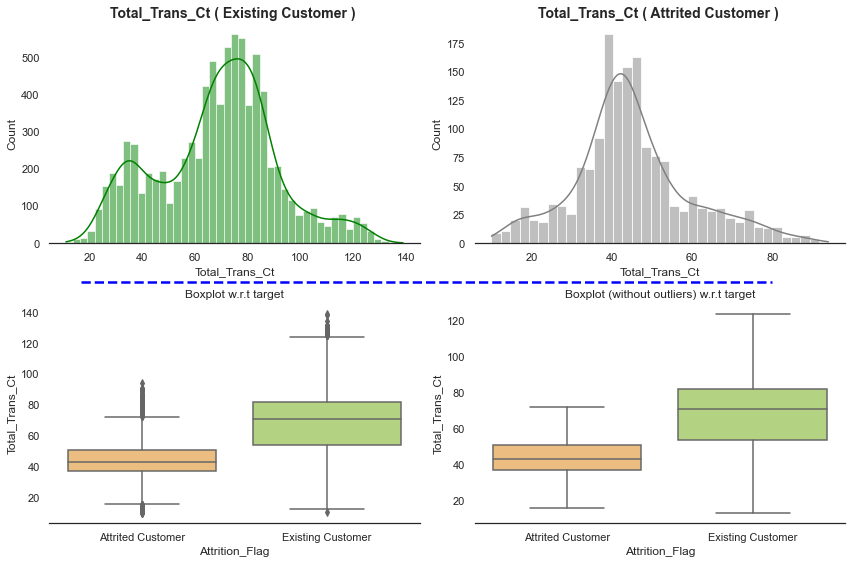

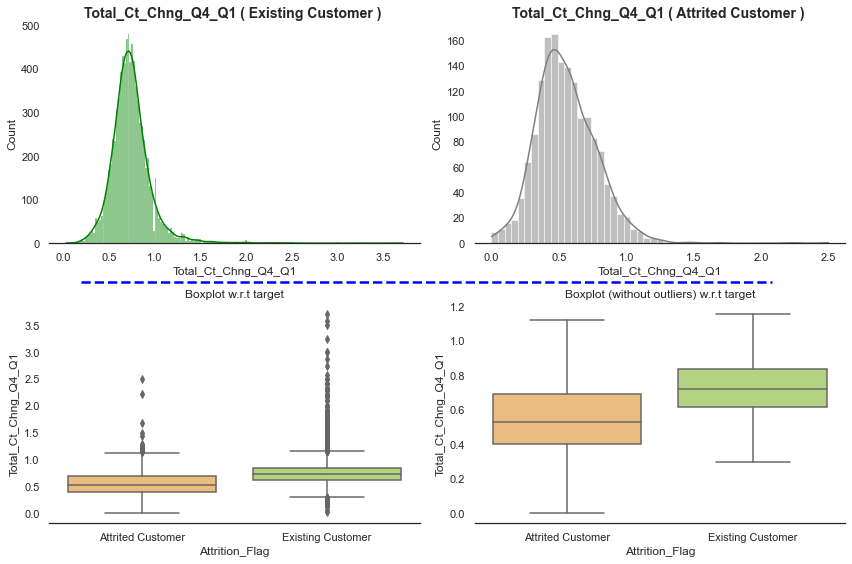

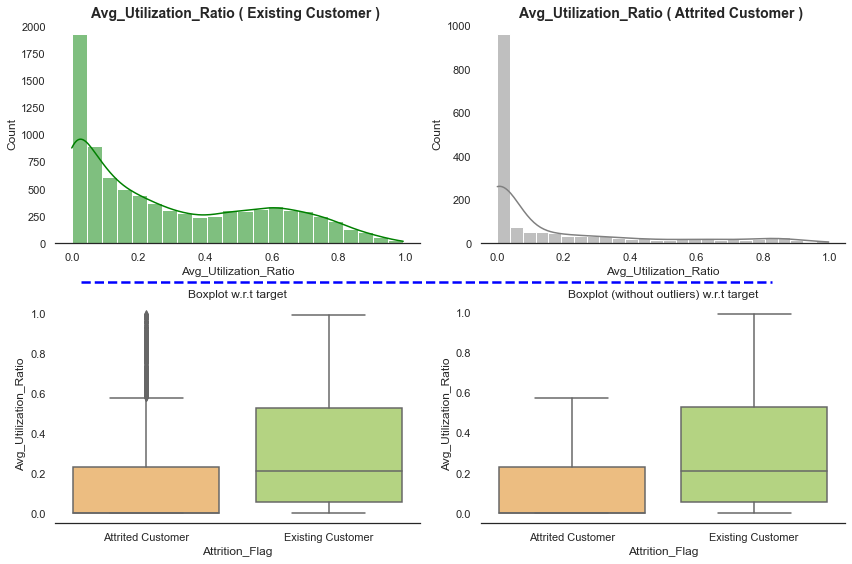

<IPython.core.display.Javascript object>

In [ ]:
# Loop thru the Numerical columns and plot the histogram and Boxplot for each of the features

# For each feature we will compare the distribution where the customer is still with the bank and
# the customer has attrited

for cols in numeric_cols:
    plot_target(df, cols)

#### Observation:


* There is no difference in Age, months on book,credit limit,average open to buy, of attrited and existing customers. It doesnt seem to have any relation with attrition.


* It seems existing customers have a higher Total Revolving Balance than customers who attrited.


* Customers with lesser transaction amount spend and low change in transaction_spend_Q1_Q4 were more likely to attrite.


* The customers with low number of transactions and low change in number of transactions between Q1 and Q4 attrited.


* On average, customers with less utlization attrited

##### Creating a new column to bucket Customer Age for better data analysis

In [ ]:
df["Age_bucket"] = pd.cut(
    df["Customer_Age"],
    bins=[25, 35, 45, 55, 65, 75],
    labels=["25-35", "36-45", "46-55", "56-65", "66-75"],
)

<IPython.core.display.Javascript object>

####  Statistics of Categorical features vs Attrition

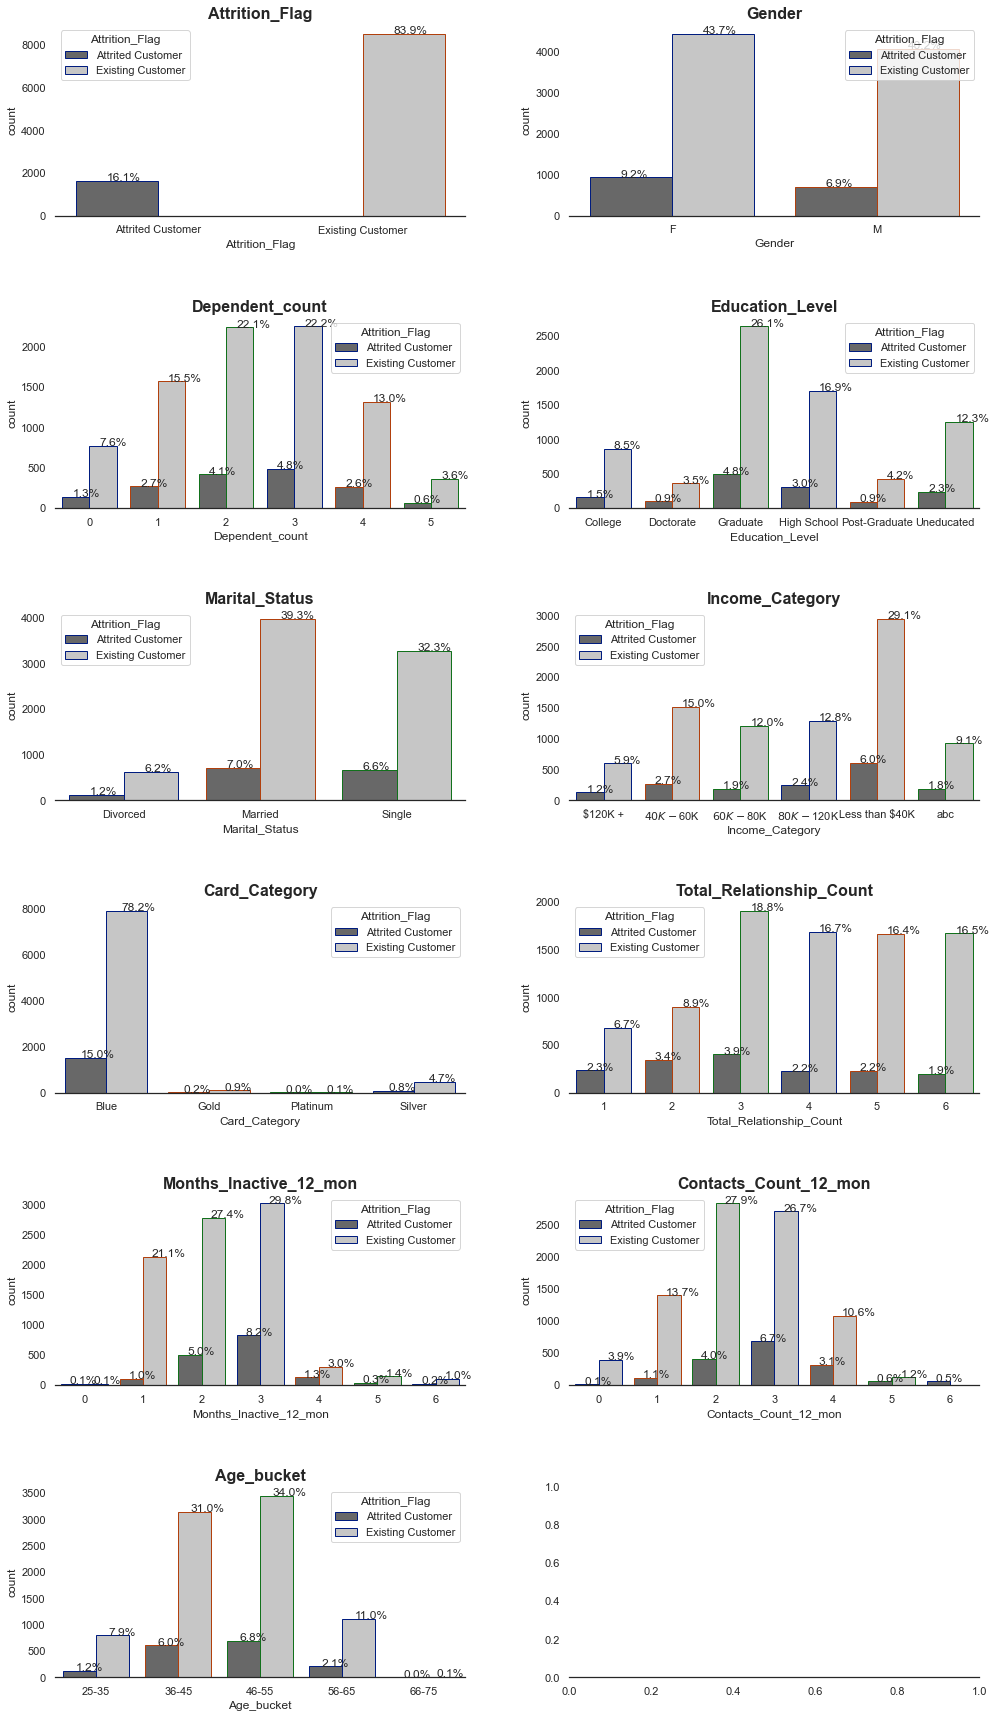

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25))

cat_f = df.select_dtypes(include="category").columns.to_list()

for i in range(len(cat_f)):
    row = i // 2
    col = i % 2
    plt_ax = axes[row, col]

    sns.countplot(
        data=df,
        x=cat_f[i],
        hue="Attrition_Flag",
        palette="Greys_r",
        edgecolor=sns.color_palette("dark", 3),
        ax=plt_ax,
    ).set_title(label=cat_f[i], fontsize=16, fontweight="bold")
    plt.xlabel(None)

    perc_cal(plt_ax, df[cat_f[i]])

sns.despine(top=True, right=True, left=True)  # to remove side line from graph
plt.tight_layout(pad=4)
plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    sns.set_palette(sns.color_palette("pastel", 8))
    target = "Attrition_Flag"
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    # print(tab1)
    print("-" * 60)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))

    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

------------------------------------------------------------


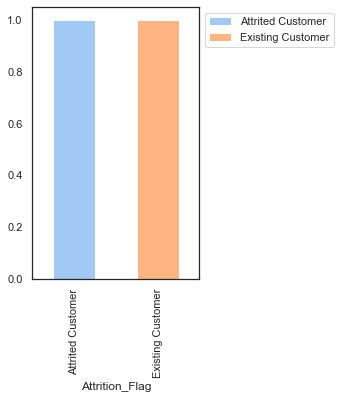

------------------------------------------------------------


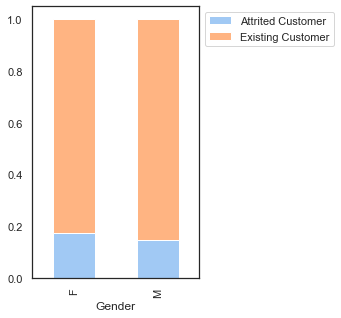

------------------------------------------------------------


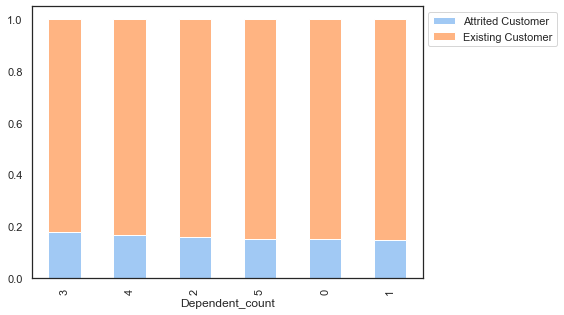

------------------------------------------------------------


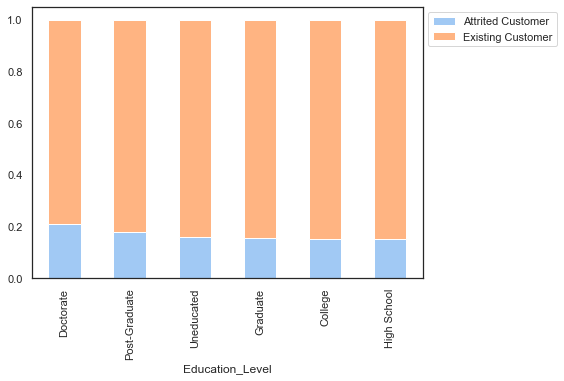

------------------------------------------------------------


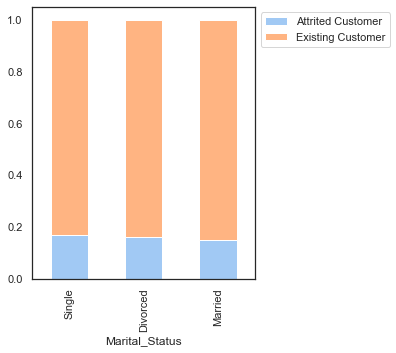

------------------------------------------------------------


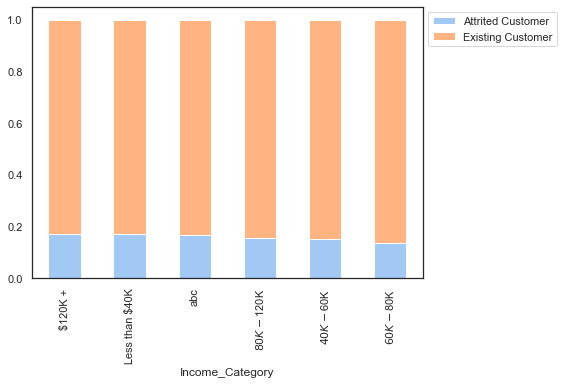

------------------------------------------------------------


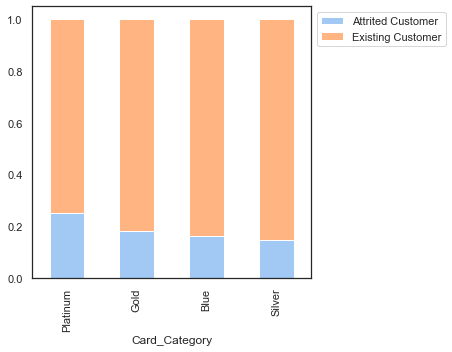

------------------------------------------------------------


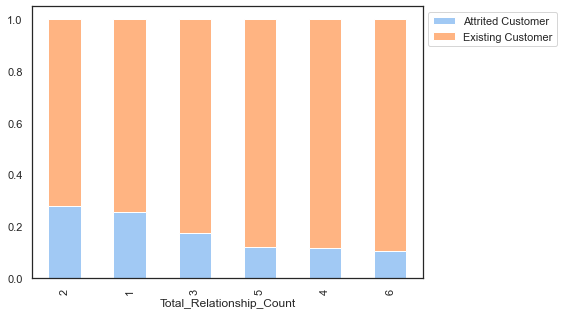

------------------------------------------------------------


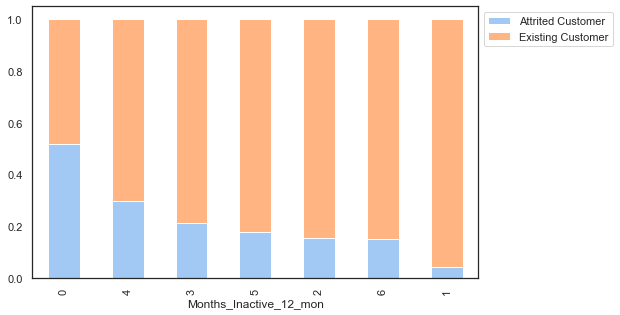

------------------------------------------------------------


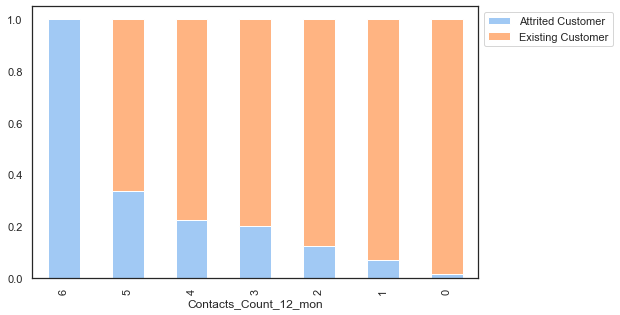

------------------------------------------------------------


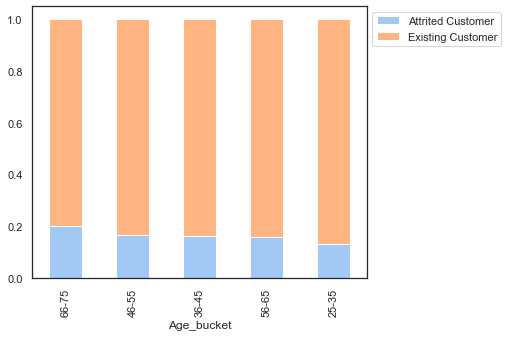

<IPython.core.display.Javascript object>

In [ ]:
cat_f = df.select_dtypes(include="category").columns.to_list()

for col in cat_f:
    stacked_barplot(df, col)

#### Observations:

* Female customer attrited more compared to male.


* Customers who were doctorate or postgraduate attrited most.


* Higher attrition is observed in Customers who earned more than 120k and less than 40k.


* Customers with plantinum card attrited more but there are very few samples. Customers with gold attrited more compared to blue and silver card.


* Custimer with 3 dependent attrited more.


* Customer having 1 or 2 bank product attrited more compared to customers with more bank products.


* Customers who were never inactive attrited most.However this cannot be concluded due to less samples.


* Customer who were contacted most in last 12 month attrited. There could be two possible reasons - 
    
    1. There was something wrong with these customers due to which Bank contacted them so many times.
    2. Too much interraction / follow-ups from the Bank for advertisement might led to attrition. 


* Customer in age range 66-75 attrited most.

### Customer Segmentation based on Product

In [ ]:
# Creating a dataframe to store just the attrited customers. It will help to understand the trend of
# customers attriting

df_attrited = df[df["Attrition_Flag"] == "Attrited Customer"]

<IPython.core.display.Javascript object>

##### Plotting how Marital Status and Gender are related to the Product of Customers attrited

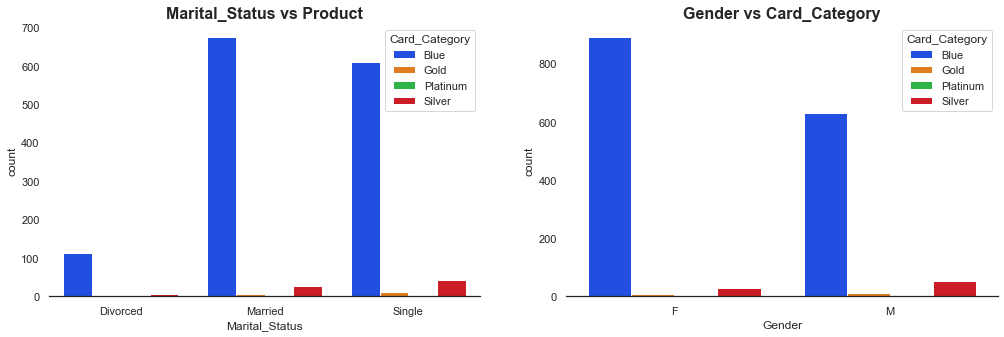

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17, 5))

sns.countplot(
    data=df_attrited, x="Marital_Status", hue="Card_Category", ax=axes[0], palette = 'bright'
).set_title("Marital_Status vs Product",fontsize=16, fontweight="bold")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph


sns.countplot(
    data=df_attrited, x="Gender", hue="Card_Category", ax=axes[1],palette = 'bright'
).set_title("Gender vs Card_Category", fontsize=16, fontweight="bold")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph


##### Plotting how Education_Level and Income_Category are related to the Product of Customers attrited

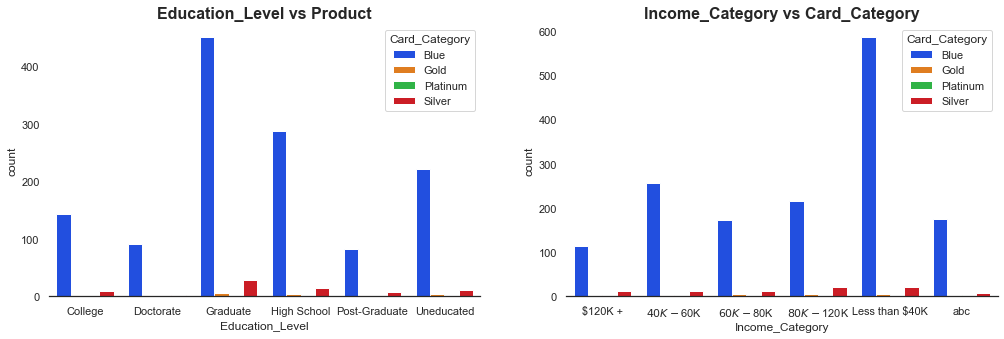

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17, 5))

sns.countplot(
    data=df_attrited,
    x="Education_Level",
    hue="Card_Category",
    ax=axes[0],
    palette="bright",
).set_title("Education_Level vs Product", fontsize=16, fontweight="bold")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph


sns.countplot(
    data=df_attrited,
    x="Income_Category",
    hue="Card_Category",
    ax=axes[1],
    palette="bright",
).set_title("Income_Category vs Card_Category", fontsize=16, fontweight="bold")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

##### Plotting how Age_bucket and Dependent_count are related to the Product of Customers attrited

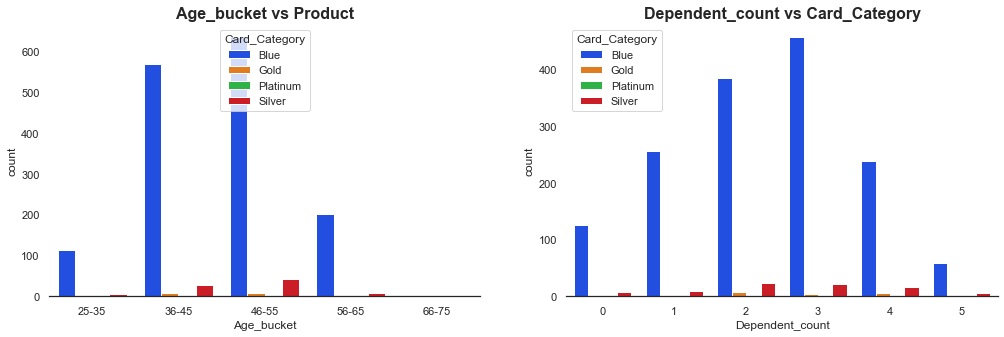

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17, 5))

sns.countplot(
    data=df_attrited, x="Age_bucket", hue="Card_Category", ax=axes[0], palette="bright",
).set_title("Age_bucket vs Product", fontsize=16, fontweight="bold")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph


sns.countplot(
    data=df_attrited,
    x="Dependent_count",
    hue="Card_Category",
    ax=axes[1],
    palette="bright",
).set_title("Dependent_count vs Card_Category", fontsize=16, fontweight="bold")
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

#### Exploring statistical distribution of various Features of Attrited Customets

In [ ]:
df_attrited[(df_attrited["Card_Category"] == "Blue")].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,1519,1,Attrited Customer,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,1519.00,NaN,NaN,NaN,46.66,7.70,26.00,41.00,47.00,52.00,68.00
Gender,1519,2,F,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,1519.00,6.00,3.00,456.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,1276,6,Graduate,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,1399,3,Married,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,1519,6,Less than $40K,586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,1519,1,Blue,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,1519.00,NaN,NaN,NaN,36.20,7.83,13.00,32.00,36.00,40.00,56.00
Total_Relationship_Count,1519.00,6.00,3.00,386.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [ ]:
df_attrited[(df_attrited["Card_Category"] == "Gold")].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,21,1,Attrited Customer,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,21.00,NaN,NaN,NaN,43.86,6.22,32.00,41.00,44.00,47.00,59.00
Gender,21,2,M,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,21.00,6.00,2.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,17,6,Graduate,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,17,2,Single,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,21,6,$60K - $80K,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,21,1,Gold,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,21.00,NaN,NaN,NaN,33.90,6.16,20.00,32.00,36.00,36.00,48.00
Total_Relationship_Count,21.00,6.00,2.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [ ]:
df_attrited[(df_attrited["Card_Category"] == "Silver")].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,82,1,Attrited Customer,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,82.00,NaN,NaN,NaN,47.16,7.47,30.00,42.25,48.00,52.00,65.00
Gender,82,2,M,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,82.00,6.00,2.00,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,73,6,Graduate,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,77,3,Single,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,82,6,$80K - $120K,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,82,1,Silver,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,82.00,NaN,NaN,NaN,36.37,7.72,18.00,33.00,36.00,42.75,56.00
Total_Relationship_Count,82.00,6.00,2.00,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [ ]:
df_attrited[(df_attrited["Card_Category"] == "Platinum")].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,5,1,Attrited Customer,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,5.00,NaN,NaN,NaN,49.40,4.16,43.00,48.00,51.00,51.00,54.00
Gender,5,2,F,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,5.00,4.00,2.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,5,3,Graduate,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,5,2,Single,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,5,3,Less than $40K,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,5,1,Platinum,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,5.00,NaN,NaN,NaN,36.00,4.53,31.00,32.00,37.00,38.00,42.00
Total_Relationship_Count,5.00,3.00,2.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

## Conclusions from EDA

* ~93 % have blue card. Very less customers have a plantinum card


* ~16% of credit card customers attrited.


* ~38 % are inactive from 3 months. Customers who are inactive from 4,5,6 month should be investigated more to see if there is any relationship with attrition


* Female customer attrited more compared to male.


* Customers who were doctorate or postgraduate attrited most.


* Higher attrition is observed in Customers who earned more than 120k and less than 40k.


* Customers with plantinum card attrited more but there are only 20 samples so this is inclusive. Customers with gold attrited more compared to blue and silver card.


* Customer in age range 36-55 attrited more.


* Customer having 1 or 2 bank product attrited more compared to customers with more bank products.


* Customers who were never inactive attrited most.However this cannot be concluded due to less samples.


* Customer who were contacted most in last 12 month attrited. There could be two possible reasons - 
    
    1. There was something wrong with these customers due to which Bank contacted them so many times.
    2. Too much interraction / follow-ups from the Bank for advertisement might led to attrition. 


* Customer in age range 66-75 attrited most.

### Churned Customer Profiling (Based on Product - Card Type)

#### Blue Card

* Mostly Female who were married.
* Age group 46-55 and earning less than 40k
* Graduate with 3 dependents.
* Used 3 products, inactive for 3 months with very low average utilzation.
* Average relationship of 36 months


#### Gold Card

* Most likely Male who are single
* Age group 36-45 earning 60- 80k
* Graduate with 2 dependents.
* Used 2 products, inactive for 3 months with very low average utilzation.
* Average relationship of 36 months


#### Silver Card

* Most likely Male who are single
* Age group 46-55 earning 80 - 120k
* Graduate with 2 dependents.
* Used 2 products, inactive for 3 months with very low average utilzation.
* Average relationship of 36 months



#### Platinum card

* Most likely Female who are single
* Age group 46-55 earning less than 40k
* Graduate with 2 dependents.
* Used 2 products, inactive for 3 months with very low average utilzation.
* Average relationship of 36 months

## Data Preprocessing

### Outlier Treatment

In [ ]:
# Following function will find Outliers in the data


Q1 = df.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

# Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1


# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

##### Finding and Printing Outlier % on each features

In [ ]:
# Looping thru all numeric_cols lists and checking outliers

(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Customer_Age            0.02
Months_on_book          3.81
Credit_Limit            9.72
Total_Revolving_Bal     0.00
Avg_Open_To_Buy         9.51
Total_Amt_Chng_Q4_Q1    3.91
Total_Trans_Amt         8.85
Total_Trans_Ct          0.02
Total_Ct_Chng_Q4_Q1     3.89
Avg_Utilization_Ratio   0.00
dtype: float64

<IPython.core.display.Javascript object>

Lets explore Outliers in following Attributes due to higher Percentage:

* `Credit_Limit` - <b>9.72</b>


* `Avg_Open_To_Buy` - <b>9.51</b>


* `Total_Trans_Amt` - <b>8.85</b>


In [ ]:
# Printing Upper Whiskers

print(upper)

Customer_Age               68.50
Months_on_book             53.50
Credit_Limit            23836.25
Total_Revolving_Bal      3921.50
Avg_Open_To_Buy         22660.75
Total_Amt_Chng_Q4_Q1        1.20
Total_Trans_Amt          8619.25
Total_Trans_Ct            135.00
Total_Ct_Chng_Q4_Q1         1.17
Avg_Utilization_Ratio       1.22
dtype: float64


<IPython.core.display.Javascript object>

In [ ]:
# Printing Lower Whiskers

print(lower)

Customer_Age                24.50
Months_on_book              17.50
Credit_Limit            -10213.75
Total_Revolving_Bal      -1778.50
Avg_Open_To_Buy         -11477.25
Total_Amt_Chng_Q4_Q1         0.29
Total_Trans_Amt          -1722.75
Total_Trans_Ct              -9.00
Total_Ct_Chng_Q4_Q1          0.23
Avg_Utilization_Ratio       -0.70
dtype: float64


<IPython.core.display.Javascript object>

##### Lets check out Credit Limit

In [ ]:
df.loc[df["Credit_Limit"] >= 23836.25].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,984.00,46.38,6.72,26.00,42.00,47.00,51.00,65.00
Months_on_book,984.00,35.99,6.78,13.00,32.00,36.00,39.00,56.00
Credit_Limit,984.00,31551.34,3764.07,23848.00,28284.50,34516.00,34516.00,34516.00
Total_Revolving_Bal,984.00,1214.22,807.69,0.00,591.50,1340.50,1834.50,2517.00
Avg_Open_To_Buy,984.00,30337.12,3841.10,21441.00,27218.25,32252.50,33244.75,34516.00
Total_Amt_Chng_Q4_Q1,984.00,0.76,0.21,0.00,0.64,0.74,0.86,2.20
Total_Trans_Amt,984.00,5673.04,4493.23,597.00,2149.25,3926.00,7911.75,17350.00
Total_Trans_Ct,984.00,69.18,27.03,10.00,47.75,69.00,87.00,139.00
Total_Ct_Chng_Q4_Q1,984.00,0.71,0.23,0.00,0.58,0.70,0.80,2.43
Avg_Utilization_Ratio,984.00,0.04,0.03,0.00,0.02,0.04,0.06,0.10


<IPython.core.display.Javascript object>

##### Lets check out Avg_Open_To_Buy

In [ ]:
df.loc[df["Avg_Open_To_Buy"] >= 22660.75].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,963.00,46.33,6.68,26.00,42.00,47.00,51.00,65.00
Months_on_book,963.00,35.96,6.81,13.00,32.00,36.00,39.00,56.00
Credit_Limit,963.00,31695.04,3679.32,22664.00,28680.00,34516.00,34516.00,34516.00
Total_Revolving_Bal,963.00,1163.38,809.68,0.00,398.00,1281.00,1793.00,2517.00
Avg_Open_To_Buy,963.00,30531.66,3650.61,22664.00,27709.00,32329.00,33256.50,34516.00
Total_Amt_Chng_Q4_Q1,963.00,0.76,0.21,0.00,0.64,0.74,0.86,2.20
Total_Trans_Amt,963.00,5680.45,4479.50,597.00,2190.50,3931.00,7918.00,17350.00
Total_Trans_Ct,963.00,69.34,26.88,10.00,48.00,69.00,87.00,139.00
Total_Ct_Chng_Q4_Q1,963.00,0.71,0.23,0.00,0.58,0.70,0.80,2.43
Avg_Utilization_Ratio,963.00,0.04,0.03,0.00,0.01,0.04,0.06,0.10


<IPython.core.display.Javascript object>

##### Lets check out Total_Trans_Amt

In [ ]:
df.loc[df["Total_Trans_Amt"] >= 8619.25].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,896.00,45.02,8.08,27.00,40.00,45.00,51.00,63.00
Months_on_book,896.00,34.99,8.13,13.00,31.00,36.00,40.00,55.00
Credit_Limit,896.00,14188.89,10873.11,2219.00,4652.25,10017.50,21177.25,34516.00
Total_Revolving_Bal,896.00,1324.35,770.48,0.00,869.75,1441.00,1890.00,2517.00
Avg_Open_To_Buy,896.00,12864.53,10889.16,553.00,3717.75,8943.50,19957.50,34516.00
Total_Amt_Chng_Q4_Q1,896.00,0.79,0.12,0.51,0.71,0.79,0.87,1.41
Total_Trans_Amt,896.00,13770.19,2302.45,8620.00,13309.75,14379.50,15196.00,18484.00
Total_Trans_Ct,896.00,105.61,15.76,50.00,97.75,107.50,117.00,139.00
Total_Ct_Chng_Q4_Q1,896.00,0.76,0.11,0.48,0.68,0.75,0.81,1.68
Avg_Utilization_Ratio,896.00,0.17,0.18,0.00,0.04,0.10,0.25,0.80


<IPython.core.display.Javascript object>

#### Observations from Outliers

* `Credit_Limit -` 9.72%,`Avg_Open_To_Buy -` 9.51% and `Total_Trans_Amt -` 8.85% are features with some considerable amount of Outliers.



* `Credit_Limit` over 23836.25 is alright. Hence cannot be considered as Outlier.



* `Avg_Open_To_Buy` over 22660.75 is alright. Hence cannot be considered as Outlier. Customers with more `Credit_Limit` will naturally have higher `Avg_Open_To_Buy`value.



* `Total_Trans_Amt` over 8619.25 is Natural. Hence cannot be considered as Outlier.

### Missing-Value Treatment




* We will use KNN imputer to impute missing values.


* **KNNImputer:** Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.


* KNN imputer replaces missing values using the average of k nearest non-missing feature values.


* Nearest points are found based on euclidean distance.


* The values obtained might not be integer always which is not be the best way to impute categorical values 

    - To take care of that we will round off the obtained values to nearest integer value

In [ ]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Age_bucket                     0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
# defining a list with names of columns that will be used for imputation
col_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

<IPython.core.display.Javascript object>

In [ ]:
# Printing all the columns where Missing value Imputation is needed

for column in col_to_impute:

    print(df[column].value_counts(dropna=False))

    print("--" * 25)

    print("\n")

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------


Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------




<IPython.core.display.Javascript object>

##### Encoding categorical features to Numeric for KNN Imputation

In [ ]:
# We need to pass numerical values for each categorical column for KNN imputation so
# we will label encode them


attrition = {"Existing Customer": 0, "Attrited Customer": 1}
df["Attrition_Flag"] = df["Attrition_Flag"].map(attrition)

education_level = {
    "Uneducated": 1,
    "High School": 2,
    "Graduate": 3,
    "College": 4,
    "Post-Graduate": 5,
    "Doctorate": 6,
}
df["Education_Level"] = df["Education_Level"].map(education_level)


marital_status = {"Single": 1, "Married": 2, "Divorced": 3}
df["Marital_Status"] = df["Marital_Status"].map(marital_status)


income_category = {
    "Less than $40K": 1,
    "$40K - $60K": 2,
    "$60K - $80K": 3,
    "$80K - $120K": 4,
    "$120K +": 5,
}
df["Income_Category"] = df["Income_Category"].map(income_category)

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_bucket
0,0,45,M,3,2,2,3.00,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,36-45
1,0,49,F,5,3,1,1.00,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,46-55
2,0,51,M,3,3,2,4.00,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,46-55
3,0,40,F,4,2,NaN,1.00,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,36-45
4,0,40,M,3,1,2,3.00,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00,36-45


<IPython.core.display.Javascript object>

* Values in Attrition_Flag, Education_Level, Marital_Status, Income_Category are **Encoded** now.

### Data Preparation for Modeling

#### Splitting the Dataset

In [ ]:
# Separating target column

# Avg_Open_To_Buy is completely related to Credit_Limit. Hence dropping this column as it will not add
# any extra value


X = df.drop(["Age_bucket", "Attrition_Flag", "Avg_Open_To_Buy"], axis=1)
y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


<IPython.core.display.Javascript object>

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

**Imputing Missing Values**

In [ ]:
# Creating an Imputer object
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [ ]:
# Fit and transform the train data
X_train[col_to_impute] = imputer.fit_transform(X_train[col_to_impute])

# Transform the val data
X_val[col_to_impute] = imputer.transform(X_val[col_to_impute])

# Transform the test data
X_test[col_to_impute] = imputer.transform(X_test[col_to_impute])

<IPython.core.display.Javascript object>

In [ ]:
# Checking that no column has missing values in train, validation or test sets

print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

<IPython.core.display.Javascript object>

* All missing values have been treated.

* Let's inverse map the encoded values.

**Decoding the Encoded values back to the Original**

In [ ]:
## Function to inverse the encoding


def inverse_mapping(x, y):
    inv_dict = {val: key for key, val in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

<IPython.core.display.Javascript object>

In [ ]:
inverse_mapping(education_level, "Education_Level")
inverse_mapping(marital_status, "Marital_Status")
inverse_mapping(income_category, "Income_Category")

<IPython.core.display.Javascript object>

**Checking inverse mapped values/categories.**

* `Checking Training Set`

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
2    1615
3    1605
1    1103
4     947
0     547
5     258
Name: Dependent_count, dtype: int64
******************************
Graduate         2509
High School      1468
Uneducated        881
College           651
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3197
Single      2448
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2160
$40K - $60K       1434
$60K - $80K       1076
$80K - $120K       956
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************
3    1372
4    1153
6    1149
5    1128
2     724
1     549
Name: Total_Relationship_Count, dtype: int64
******************************
3    2305
2    1952
1    134

<IPython.core.display.Javascript object>

* `Checking Validation Set`

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
3    572
2    520
1    364
4    315
0    169
5     86
Name: Dependent_count, dtype: int64
******************************
Graduate         837
High School      479
Uneducated       306
College          204
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1076
Single       794
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    749
$40K - $60K       491
$60K - $80K       357
$80K - $120K      293
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************
3    472
4    383
5    373
6    373
2    243
1    182
Name: Total_Relationship_Count, dtype: int64
******************************
3    741
2    667
1    464
4     84
5     33
6     

<IPython.core.display.Javascript object>

* `Checking Test Set`

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
3    555
2    520
1    371
4    312
0    188
5     80
Name: Dependent_count, dtype: int64
******************************
Graduate         854
High School      467
Uneducated       300
College          204
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     1028
Single       836
Divorced     162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    707
$40K - $60K       501
$60K - $80K       384
$80K - $120K      292
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************
3    461
5    390
4    376
6    344
2    276
1    179
Name: Total_Relationship_Count, dtype: int64
******************************
3    800
2    663
1    421
4     79
5     35
6     

<IPython.core.display.Javascript object>

* Everything looks fine now and decoded back to actual values.


* Missing Values are also Imputed

### Creating Dummy Variables

In [ ]:
# Using pandas Get dummies to create dummy columns


# On Training Set
X_train = pd.get_dummies(X_train, drop_first=True)


# On Validation Set
X_val = pd.get_dummies(X_val, drop_first=True)


# On Test Set
X_test = pd.get_dummies(X_test, drop_first=True)


print(X_train.shape, X_val.shape, X_test.shape)

(6075, 46) (2026, 46) (2026, 46)


<IPython.core.display.Javascript object>

* After encoding there are 46 columns on each Training, Validation and Test data.


* There are 6075 records in Training and 2026 records in Validation and Test set.

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:

* Predicting a customer **will churn** but in reality he does not - **Loss of resources**
* Predicting a customer **will not churn** the services but he does  - **Loss of Business**


#### Which case is more important? 

* Predicting that customer will not churn but he does i.e. losing on a potential source of income for the bank . Bank can taken actions to stop these customer from churning.



#### How to reduce this loss i.e need to reduce False Negatives?

* Banks wants Recall to be maximized, greater the Recall lesser the chances of false negatives means lesser chances of predicting customers will not churn when in reality they do.

### Developing some Funtions to evaluate Models:

##### Function to plot a Confusion Matrix

In [ ]:
def confusion_matrix_sklearn(desc, model, predictors, target, axes):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred, labels=[1, 0])
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="turbo",
        xticklabels=[1, 0],
        yticklabels=[1, 0],
        ax=axes,
    ).set_title(label=desc, fontsize=16, fontweight="bold")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

##### Creating a Function to evaluate Model Performance on various Parameters

In [ ]:
def model_scorings(model, model_desc):
    """
    Model Scoring Function
    
    model - Model Object
    X_train - Independent features of Training Data
    X_val  -  Independent features of Validation Data
    y_train - Actual Target value of Training Data
    y_val  - Actual Target value of Validation Data
    """
    # Model Predictions
    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_val)

    # Scorings on Training Data
    train_accuracy = round(metrics.accuracy_score(y_train, y_train_predict), 2)
    train_recall = round(metrics.recall_score(y_train, y_train_predict), 2)
    train_precision = round(metrics.precision_score(y_train, y_train_predict), 2)
    train_f1 = round(metrics.f1_score(y_train, y_train_predict), 2)

    # Scorings on Test Data
    test_accuracy = round(metrics.accuracy_score(y_val, y_val_predict), 2)
    test_recall = round(metrics.recall_score(y_val, y_val_predict), 2)
    test_precision = round(metrics.precision_score(y_val, y_val_predict), 2)
    test_f1 = round(metrics.f1_score(y_val, y_val_predict), 2)

    score_dict = {
        "Model": model_desc,
        "Accuracy (Train)": train_accuracy,
        "Accuracy (Validation)": test_accuracy,
        "Recall (Train)": train_recall,
        "Recall (Validation)": test_recall,
        "Precision (Train)": train_precision,
        "Precision (Validation)": test_precision,
        "F1 (Train)": train_f1,
        "F1 (Validation)": test_f1,
    }

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plt_ax0 = axes[0]
    confusion_matrix_sklearn("Training Data", model, X_train, y_train, plt_ax0)

    plt_ax1 = axes[1]
    confusion_matrix_sklearn("Validation Data", model, X_val, y_val, plt_ax1)

    return pd.DataFrame(score_dict, index=[1])

<IPython.core.display.Javascript object>

##### Visualizing the Decision Tree (Default Decision Tree Model)

In [ ]:
# Defining below function to visualize a decision tree using model


def view_my_tree(model, features):
    plt.figure(figsize=(12, 10))
    out = tree.plot_tree(
        model,
        feature_names=features,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

<IPython.core.display.Javascript object>

##### Visualizing Feature Importance

In [ ]:
# Defining below function to view and plot the importance of each features


def feature_importance(model, features):
    feature_imp_df = pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)

    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(15, 12))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="green", align="center")
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

    return feature_imp_df.T

<IPython.core.display.Javascript object>

**Let's start by building different models using KFold and cross_val_score**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k 
- 1 remaining folds form the training set.



**Lets build following Models on Training Data and Predict on Validation Data**

1. LogisticRegression


2. Decision Tree


3. RandomForest


4. Bagging


5. AdaBoost


6. GradientBoost


7. XGBoost

In [ ]:
def model_analysis(X_train, y_train, sample_type):
    """
    1. Creating a List of all Models.    
    2. Using Cross validation finding Model performance and storing in a list
    3. Training each model in a loop and storing Model recall score in another list
    4. Predicting each model in a loop on Validation Set and storing the performance in another list
    5. Creating a DataFrame with the summarized model performance and returning back
    """
    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("Logistic Regression", LogisticRegression(random_state=1)))
    models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("Random forest", RandomForestClassifier(random_state=1)))
    models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

    results = []  # Empty list to store all model's CV scores
    names = []  # Empty list to store name of the models

    tr_score_list = []  # Empty list to store the Training Scores
    val_score_list = []  # Empty list to store the Validation Scores

    # loop through all models to get the mean cross validated score
    print("\n" "Cross-Validation Performance:")
    print("-------------------------------------\n")

    for name, model in models:
        scoring = "recall"
        kfold = StratifiedKFold(
            n_splits=5, shuffle=True, random_state=1
        )  # Setting number of splits equal to 5
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
        )
        results.append(round(cv_result.mean() * 100, 2))
        names.append(name)
        print("{}: {}".format(name, round(cv_result.mean() * 100, 2)))

    print("\n" "======= X ================= X ================== X =========" "\n")

    print("\n" "Training Set Performance:")
    print("-------------------------------------\n")

    for name, model in models:
        model.fit(X_train, y_train)
        train_scores = recall_score(y_train, model.predict(X_train)) * 100
        tr_score_list.append(round(train_scores, 2))
        print("{}: {}".format(name, round(train_scores, 2)))

    print("\n" "======= X ================= X ================== X =========" "\n")

    print("\n" "Validation Set Performance:")
    print("-------------------------------------\n")

    for name, model in models:
        model.fit(X_train, y_train)
        validation_scores = recall_score(y_val, model.predict(X_val)) * 100
        val_score_list.append(round(validation_scores, 2))
        print("{}: {}".format(name, round(validation_scores, 2)))

    if sample_type == "train":
        score_dict = {
            "Model": names,
            "CV Score": results,
            "Training": tr_score_list,
            "Validation": val_score_list,
        }
    elif sample_type == "over":
        score_dict = {
            "Model": names,
            "CV Score(Over Sampled)": results,
            "Training(Over Sampled)": tr_score_list,
            "Validation(Over Sampled)": val_score_list,
        }
    elif sample_type == "under":
        score_dict = {
            "Model": names,
            "CV Score(Under Sampled)": results,
            "Training(Under Sampled)": tr_score_list,
            "Validation(Under Sampled)": val_score_list,
        }
    else:
        print(" Unknown Sample Type ")
        return -1

    algo_results = pd.DataFrame(score_dict)

    return algo_results

<IPython.core.display.Javascript object>

**Performing Model Analysis of all 7 Models using Training Data**

In [ ]:
x_train_analysis = model_analysis(X_train, y_train, "train")
x_train_analysis.sort_values(by="Validation", ascending=False)


Cross-Validation Performance:
-------------------------------------

Logistic Regression: 33.2
Decision Tree: 77.86
Bagging: 77.66
Random forest: 70.9
Gradient Boost: 81.35
Adaboost: 80.53
Xgboost: 85.24

======= X ================= X ================== X =========


Training Set Performance:
-------------------------------------

Logistic Regression: 25.51
Decision Tree: 100.0
Bagging: 98.57
Random forest: 100.0
Gradient Boost: 87.09
Adaboost: 83.81
Xgboost: 100.0

======= X ================= X ================== X =========


Validation Set Performance:
-------------------------------------

Logistic Regression: 33.74
Decision Tree: 77.3
Bagging: 78.83
Random forest: 73.93
Gradient Boost: 81.9
Adaboost: 81.29
Xgboost: 89.26


,Model,CV Score,Training,Validation
6,Xgboost,85.24,100.00,89.26
4,Gradient Boost,81.35,87.09,81.90
5,Adaboost,80.53,83.81,81.29
2,Bagging,77.66,98.57,78.83
1,Decision Tree,77.86,100.00,77.30
3,Random forest,70.90,100.00,73.93
0,Logistic Regression,33.20,25.51,33.74


<IPython.core.display.Javascript object>

#### Model Performance on Normal Training Data and Predicting on Validation Set


* XGBoost, Gradient Boost and AdaBoost are the top 3 Performer.


* Above 3 models gave Highest CV Score and Recall score on validation data.


* XGBoost and Gradient Boost seems to be Overfitting but it can be take care of by following Oversampling, Undersampling and Hyper Parameter tuning process.

### Oversampling train data using SMOTE

In [ ]:
# Synthetic Minority Over Sampling Technique

print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 46)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

**Performing Model Analysis of all 7 Models using Over Sampled Training Data**

In [ ]:
x_train_over_analysis = model_analysis(X_train_over, y_train_over, "over")
x_train_over_analysis.sort_values(by="Validation(Over Sampled)", ascending=False)


Cross-Validation Performance:
-------------------------------------

Logistic Regression: 82.47
Decision Tree: 94.88
Bagging: 95.82
Random forest: 96.55
Gradient Boost: 97.51
Adaboost: 96.88
Xgboost: 97.96

======= X ================= X ================== X =========


Training Set Performance:
-------------------------------------

Logistic Regression: 83.06
Decision Tree: 100.0
Bagging: 99.78
Random forest: 100.0
Gradient Boost: 98.08
Adaboost: 96.8
Xgboost: 100.0

======= X ================= X ================== X =========


Validation Set Performance:
-------------------------------------

Logistic Regression: 70.25
Decision Tree: 80.67
Bagging: 84.36
Random forest: 76.99
Gradient Boost: 87.73
Adaboost: 88.04
Xgboost: 91.1


,Model,CV Score(Over Sampled),Training(Over Sampled),Validation(Over Sampled)
6,Xgboost,97.96,100.00,91.10
5,Adaboost,96.88,96.80,88.04
4,Gradient Boost,97.51,98.08,87.73
2,Bagging,95.82,99.78,84.36
1,Decision Tree,94.88,100.00,80.67
3,Random forest,96.55,100.00,76.99
0,Logistic Regression,82.47,83.06,70.25


<IPython.core.display.Javascript object>

#### Model Performance on Oversampled Training Data and Predicting on Validation Set


* XGBoost, AdaBoost and Gradient Boost are the top 3 Performer.


* Above 3 models gave Highest CV Score and Recall score on validation data.


* All 3 of them seems to be Overfitting but we will explore other ways to reduce this.

### Undersampling train data using Random Under Sampler

In [ ]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))


rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)


print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_under == 1)))
print(
    "After Undersampling, counts of label 'No': {} \n".format(sum(y_train_under == 0))
)

print("After Undersampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 46)
After Undersampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

**Performing Model Analysis of all 7 Models using Under Sampled Training Data**

In [ ]:
x_train_under_analysis = model_analysis(X_train_under, y_train_under, "under")
x_train_under_analysis.sort_values(by="Validation(Under Sampled)", ascending=False)


Cross-Validation Performance:
-------------------------------------

Logistic Regression: 76.23
Decision Tree: 88.63
Bagging: 90.17
Random forest: 92.62
Gradient Boost: 94.26
Adaboost: 92.42
Xgboost: 94.67

======= X ================= X ================== X =========


Training Set Performance:
-------------------------------------

Logistic Regression: 73.36
Decision Tree: 100.0
Bagging: 98.77
Random forest: 100.0
Gradient Boost: 97.85
Adaboost: 94.88
Xgboost: 100.0

======= X ================= X ================== X =========


Validation Set Performance:
-------------------------------------

Logistic Regression: 73.62
Decision Tree: 86.5
Bagging: 91.1
Random forest: 93.87
Gradient Boost: 94.48
Adaboost: 94.17
Xgboost: 96.32


,Model,CV Score(Under Sampled),Training(Under Sampled),Validation(Under Sampled)
6,Xgboost,94.67,100.00,96.32
4,Gradient Boost,94.26,97.85,94.48
5,Adaboost,92.42,94.88,94.17
3,Random forest,92.62,100.00,93.87
2,Bagging,90.17,98.77,91.10
1,Decision Tree,88.63,100.00,86.50
0,Logistic Regression,76.23,73.36,73.62


<IPython.core.display.Javascript object>

#### Model Performance on Undersampled Training Data and Predicting on Validation Set


* XGBoost, Gradient Boost and AdaBoost are the top 3 Performer.


* Above 3 models gave Highest CV Score and Recall score on validation data.


* XGBoost and Gradient Boost still seems to be little Overfitting (almost negligible).


* AdaBoost gave the best performance where it's able to generalize the data and gave a similar performance both on training and validation set.

**Creating a Model Score Sheet to put together all 21(7 X 3) Model Scorings at one place**

In [ ]:
x = pd.merge(
    left=x_train_over_analysis, right=x_train_under_analysis, how="inner", on="Model",
)

model_score_sheet = pd.merge(left=x_train_analysis, right=x, how="inner", on="Model")

model_score_sheet

,Model,CV Score,Training,Validation,CV Score(Over Sampled),Training(Over Sampled),Validation(Over Sampled),CV Score(Under Sampled),Training(Under Sampled),Validation(Under Sampled)
0,Logistic Regression,33.20,25.51,33.74,82.47,83.06,70.25,76.23,73.36,73.62
1,Decision Tree,77.86,100.00,77.30,94.88,100.00,80.67,88.63,100.00,86.50
2,Bagging,77.66,98.57,78.83,95.82,99.78,84.36,90.17,98.77,91.10
3,Random forest,70.90,100.00,73.93,96.55,100.00,76.99,92.62,100.00,93.87
4,Gradient Boost,81.35,87.09,81.90,97.51,98.08,87.73,94.26,97.85,94.48
5,Adaboost,80.53,83.81,81.29,96.88,96.80,88.04,92.42,94.88,94.17
6,Xgboost,85.24,100.00,89.26,97.96,100.00,91.10,94.67,100.00,96.32


<IPython.core.display.Javascript object>

### Conclusion from comparison of all the Models

* We can see that XGBoost is giving the best performance followed by Gradient Boost, Adaboost. 


* Logistic Regression gave a maximum recall of just ~73% on validation set which is the lowest in group. 



* Decision Tree, Bagging and Random Forests are seems to be highly Over-Fitting.


* Best performing three models are XGBoost model, Gradient Boost, Adaboost.


* Based on the performance of all these models on training, over sampled and under sampled data, we will tune our 3 best models to see if the performance improves after tuning.

    1. AdaBoost
    
    2. Gradient Boost
    
    3. XGBoost

#### Logistic Regression Performance is very Low. Lets try Regularization and see how it behaves

<h1 style="background-color:yellow;">Regularization:</h1> 

Regularization is the process which regularizes or shrinks the coefficients towards zero. In simple words, regularization discourages learning a more complex or flexible model, to prevent overfitting.

**Main Regularization Techniques**

1. **Ridge Regression (L2 Regularization)** - Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.

2. **Lasso Regression (L1 Regularizaion)** - Lasso adds "absolute values of magnitude of coefficient as penalty term to the loss function

1. Using **Training Data** to tune a Logistic Regression Model along with Regularization

In [ ]:
# Choose the type of classifier.
lr_regu = LogisticRegression(random_state=1)

# Grid of parameters to choose from
parameters = {
    "C": np.arange(0.007, 0.5, 0.01),
    "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
    "penalty": ["l1", "l2"],
}

# Run the grid search
grid_obj = RandomizedSearchCV(lr_regu, parameters, scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
lr_regu = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_regu.fit(X_train, y_train)

LogisticRegression(C=0.4370000000000001, penalty='l1', random_state=1,
                   solver='liblinear')

<IPython.core.display.Javascript object>

,Model,Accuracy (Train),Accuracy (Validation),Recall (Train),Recall (Validation),Precision (Train),Precision (Validation),F1 (Train),F1 (Validation)
1,LR Regularized,0.91,0.92,0.59,0.65,0.77,0.82,0.67,0.73


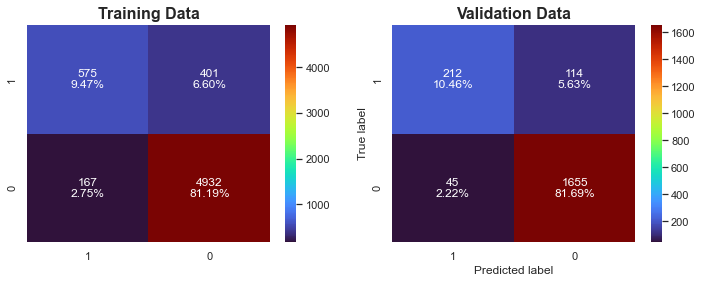

<IPython.core.display.Javascript object>

In [ ]:
# Regularized LR Model Scoring

lr_regu_score = model_scorings(lr_regu, "LR Regularized")
lr_regu_score

2. Using **Over Sampled Training Data** to tune a Logistic Regression Model along with Regularization

In [ ]:
# Choose the type of classifier.
lr_regu_over = LogisticRegression(random_state=1)

# Grid of parameters to choose from
parameters = {
    "C": np.arange(0.007, 0.5, 0.01),
    "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
    "penalty": ["l1", "l2"],
}

# Run the grid search
grid_obj = RandomizedSearchCV(lr_regu_over, parameters, scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_regu_over = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_regu_over.fit(X_train_over, y_train_over)

LogisticRegression(C=0.10700000000000003, random_state=1)

<IPython.core.display.Javascript object>

,Model,Accuracy (Train),Accuracy (Validation),Recall (Train),Recall (Validation),Precision (Train),Precision (Validation),F1 (Train),F1 (Validation)
1,LR Over Sampled Regularized,0.84,0.84,0.48,0.49,0.50,0.51,0.49,0.50


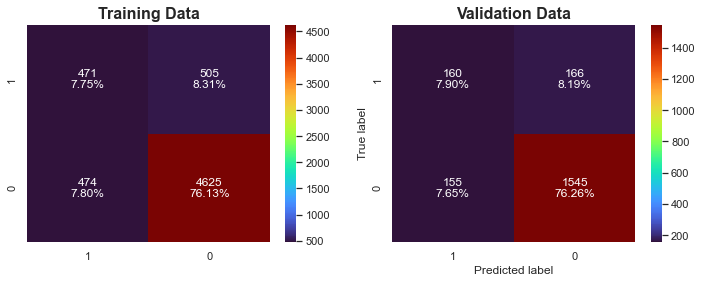

<IPython.core.display.Javascript object>

In [ ]:
# Regularized LR Model on Over Sampled Training Scoring

lr_regu_over_score = model_scorings(lr_regu_over, "LR Over Sampled Regularized")
lr_regu_over_score

3. Using **Under Sampled Training Data** to tune a Logistic Regression Model along with Regularization

In [ ]:
# Choose the type of classifier.
lr_regu_under = LogisticRegression(random_state=1)

# Grid of parameters to choose from
parameters = {
    "C": np.arange(0.007, 0.5, 0.01),
    "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
    "penalty": ["l1", "l2"],
}

# Run the grid search
grid_obj = RandomizedSearchCV(lr_regu_under, parameters, scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
lr_regu_under = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_regu_under.fit(X_train_under, y_train_under)

LogisticRegression(C=0.4670000000000001, random_state=1, solver='liblinear')

<IPython.core.display.Javascript object>

,Model,Accuracy (Train),Accuracy (Validation),Recall (Train),Recall (Validation),Precision (Train),Precision (Validation),F1 (Train),F1 (Validation)
1,LR Under Sampled Regularized,0.84,0.85,0.84,0.85,0.50,0.52,0.63,0.64


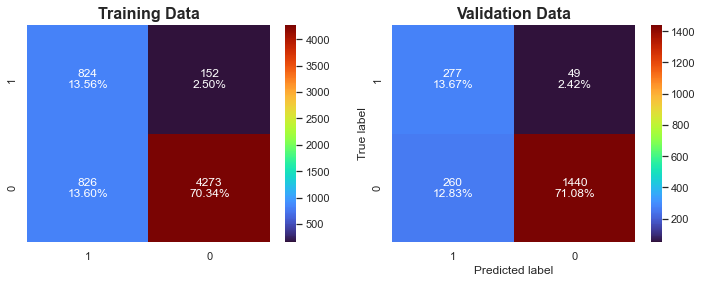

<IPython.core.display.Javascript object>

In [ ]:
# Regularized LR Model on Over Sampled Training Scoring

lr_regu_under_score = model_scorings(lr_regu_under, "LR Under Sampled Regularized")
lr_regu_under_score

### Observation from Regularization:


1. We have tried Regularization on Logistic Regression Model as it was poorly performing earlier.


2. a. Tuned and Regularized on Training Data and Predicted on Validation Set. 

   b. Tuned and Regularized on Over Sampled Training Data and Predicted on Validation Set.
   
   c. Tuned and Regularized on Under Sampled Training Data and Predicted on Validation Set.
   

3. Among above 3, the Under Sample Regularized model generalized well on training and validation set . Our recall after undersampling on validation set was better than our recall after oversampling on test.


4. Received a Recall Score of 84% on Under Sampled Training Data and 85% on Validation set which is better but we have Other models that performed better than this.

###  <h1 style="color:Tomato;">Hyperparameter tuning using Random search</h1>




**Random Search:** Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.


* We will tune Adaboost, Gradient Boost and XGboost models using RandomizedSearchCV.

#### <h1 style="background-color:powderblue;text-align:center;">AdaBoost<h1>

In [ ]:
# Choose the type of classifier.
ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=ada_tuned,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

,Model,Accuracy (Train),Accuracy (Validation),Recall (Train),Recall (Validation),Precision (Train),Precision (Validation),F1 (Train),F1 (Validation)
1,AdaBoost Tuned,0.97,0.96,0.89,0.83,0.93,0.90,0.91,0.86


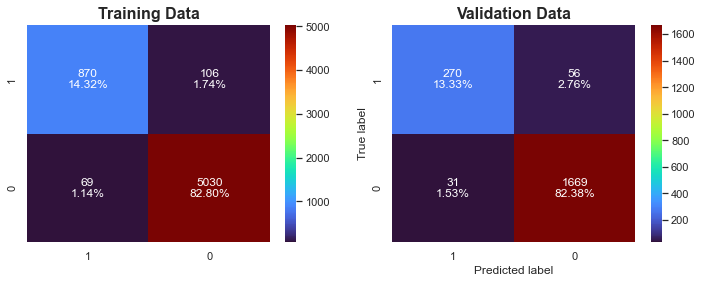

<IPython.core.display.Javascript object>

In [ ]:
# Tuned AdaBoost Model Scoring

ada_tuned_score = model_scorings(ada_tuned, "AdaBoost Tuned")
ada_tuned_score

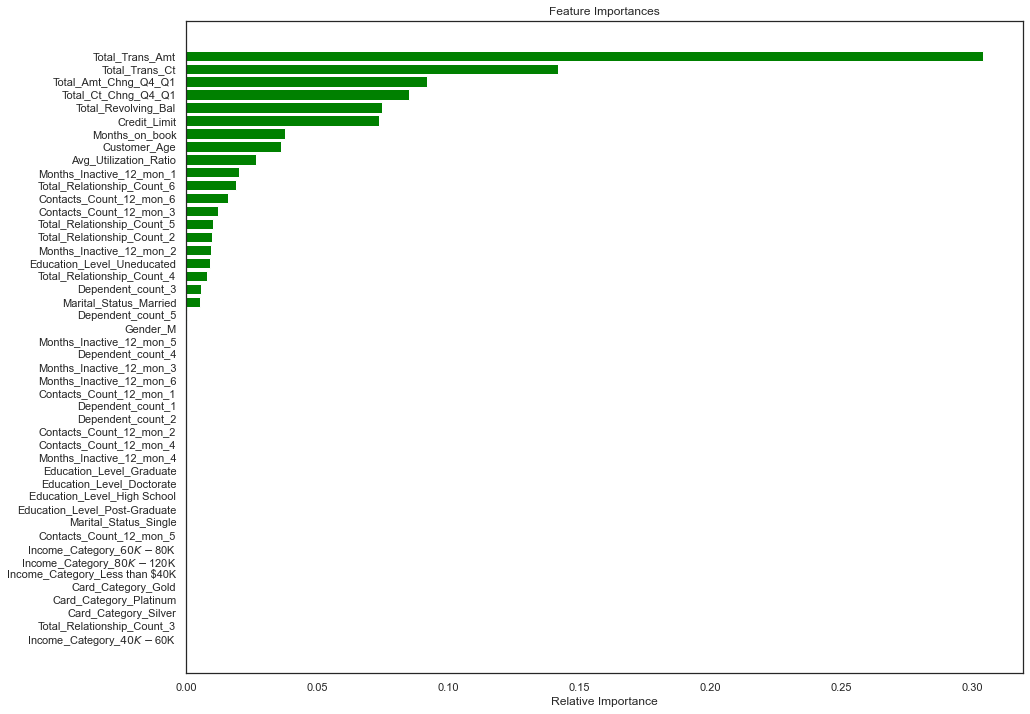

,Total_Trans_Amt,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Credit_Limit,Months_on_book,Customer_Age,Avg_Utilization_Ratio,Months_Inactive_12_mon_1,Total_Relationship_Count_6,Contacts_Count_12_mon_6,Contacts_Count_12_mon_3,Total_Relationship_Count_5,Total_Relationship_Count_2,Months_Inactive_12_mon_2,Education_Level_Uneducated,Total_Relationship_Count_4,Dependent_count_3,Marital_Status_Married,Dependent_count_5,Gender_M,Education_Level_Post-Graduate,Dependent_count_1,Contacts_Count_12_mon_5,Contacts_Count_12_mon_4,Contacts_Count_12_mon_2,Contacts_Count_12_mon_1,Months_Inactive_12_mon_6,Months_Inactive_12_mon_5,Months_Inactive_12_mon_4,Months_Inactive_12_mon_3,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Total_Relationship_Count_3,Dependent_count_4,Card_Category_Silver,Card_Category_Platinum,Card_Category_Gold,Income_Category_Less than $40K,Income_Category_$80K - $120K,Dependent_count_2,Income_Category_$40K - $60K,Marital_Status_Single,Income_Category_$60K - $80K
Imp,0.30,0.14,0.09,0.09,0.08,0.07,0.04,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [ ]:
# Plotting Feature Importance

ada_tuned_feature_imp = feature_importance(model=ada_tuned, features=X_train.columns)

ada_tuned_feature_imp

**Conclusion from Tuned AdaBoost Model**

* Recall of 89% on Training Data and 83% on Validation set. 


* 2.76% cases are False Negative cases. These Customers were predicted as they will not attrite but actually they did.


* Total_Trans_Amt, Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal and Credit_Limit are some impotant features.

#### <h1 style="background-color:powderblue;text-align:center;">Gradient Boost</h1>

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_gb = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_depth": [10, 20],
    "min_samples_leaf": [10, 20],
    "min_samples_split": [25, 35],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
gbc_randomized_cv = RandomizedSearchCV(
    estimator=gbc_tuned,
    param_distributions=param_gb,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
gbc_randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = gbc_randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=0.8, min_samples_leaf=20,
                           min_samples_split=35, n_estimators=200,
                           random_state=1, subsample=1)

<IPython.core.display.Javascript object>

,Model,Accuracy (Train),Accuracy (Validation),Recall (Train),Recall (Validation),Precision (Train),Precision (Validation),F1 (Train),F1 (Validation)
1,Gradient Boost Tuned,1.00,0.97,1.00,0.88,1.00,0.94,1.00,0.91


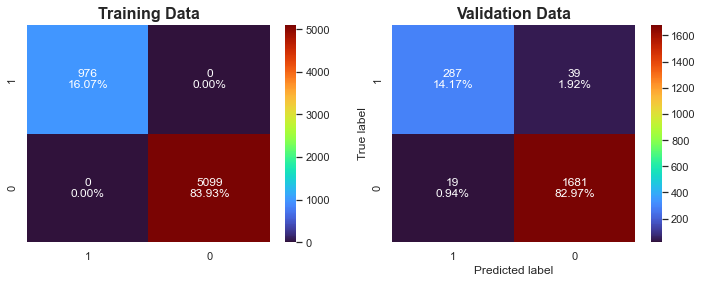

<IPython.core.display.Javascript object>

In [ ]:
# Tuned Gradient Boost Model Scoring

gbc_tuned_score = model_scorings(gbc_tuned, "Gradient Boost Tuned")
gbc_tuned_score

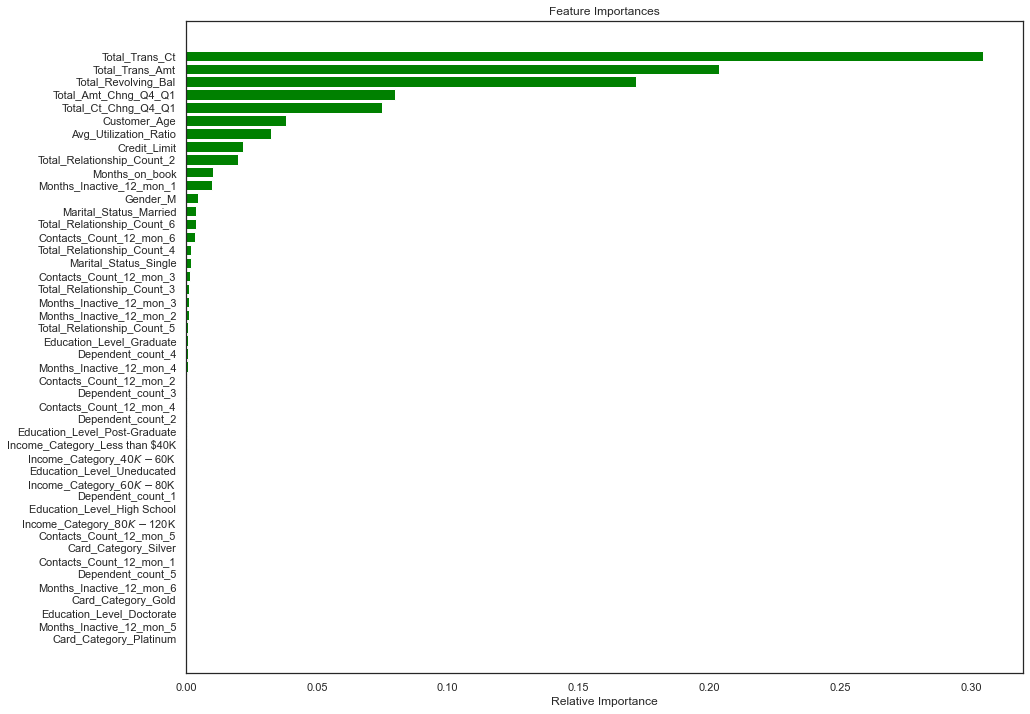

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Customer_Age,Avg_Utilization_Ratio,Credit_Limit,Total_Relationship_Count_2,Months_on_book,Months_Inactive_12_mon_1,Gender_M,Marital_Status_Married,Total_Relationship_Count_6,Contacts_Count_12_mon_6,Total_Relationship_Count_4,Marital_Status_Single,Contacts_Count_12_mon_3,Total_Relationship_Count_3,Months_Inactive_12_mon_3,Months_Inactive_12_mon_2,Total_Relationship_Count_5,Education_Level_Graduate,Dependent_count_4,Months_Inactive_12_mon_4,Contacts_Count_12_mon_2,Dependent_count_3,Contacts_Count_12_mon_4,Dependent_count_2,Education_Level_Post-Graduate,Income_Category_Less than $40K,Income_Category_$40K - $60K,Education_Level_Uneducated,Income_Category_$60K - $80K,Dependent_count_1,Education_Level_High School,Income_Category_$80K - $120K,Contacts_Count_12_mon_5,Card_Category_Silver,Contacts_Count_12_mon_1,Dependent_count_5,Months_Inactive_12_mon_6,Card_Category_Gold,Education_Level_Doctorate,Card_Category_Platinum,Months_Inactive_12_mon_5
Imp,0.30,0.20,0.17,0.08,0.07,0.04,0.03,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [ ]:
# Plotting Feature Importance

gbc_tuned_feature_imp = feature_importance(model=gbc_tuned, features=X_train.columns)

gbc_tuned_feature_imp

**Conclusion from Tuned Gradient Boost Model**

* Recall of 100% on Training Data and 88% on Validation set. 


* 1.92% cases are False Negative cases. These Customers were predicted as they will not attrite but actually they did.


* Model seems to be overfitting.


* Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1 and Customer_Age are some impotant features.

#### <h1 style="background-color:powderblue;text-align:center;">XGBoost</h1>

In [ ]:
# defining model
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(50, 150, 50),
    "scale_pos_weight": [2, 5, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3, 5],
    "subsample": [0.8, 0.9, 1],
    "max_depth": np.arange(1, 5, 1),
    "reg_lambda": [5, 10],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
xgb_random_cv = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
xgb_random_cv.fit(X_train, y_train)


# Set the clf to the best combination of parameters
xgb_tuned = xgb_random_cv.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=5, ...)

<IPython.core.display.Javascript object>

,Model,Accuracy (Train),Accuracy (Validation),Recall (Train),Recall (Validation),Precision (Train),Precision (Validation),F1 (Train),F1 (Validation)
1,XGBoost Tuned,0.93,0.92,0.99,0.96,0.70,0.69,0.82,0.80


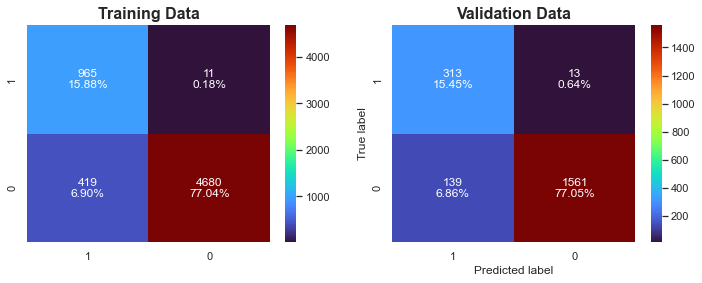

<IPython.core.display.Javascript object>

In [ ]:
# Tuned XG Boost Model Scoring

xgb_tuned_score = model_scorings(xgb_tuned, "XGBoost Tuned")
xgb_tuned_score

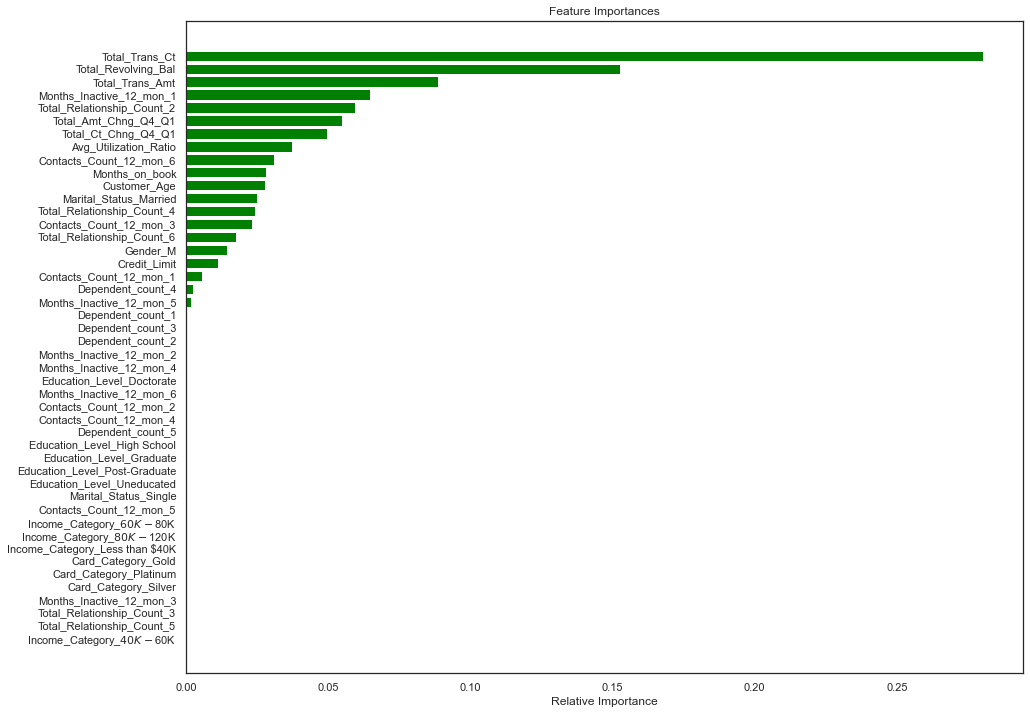

,Total_Trans_Ct,Total_Revolving_Bal,Total_Trans_Amt,Months_Inactive_12_mon_1,Total_Relationship_Count_2,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Contacts_Count_12_mon_6,Months_on_book,Customer_Age,Marital_Status_Married,Total_Relationship_Count_4,Contacts_Count_12_mon_3,Total_Relationship_Count_6,Gender_M,Credit_Limit,Contacts_Count_12_mon_1,Dependent_count_4,Months_Inactive_12_mon_5,Contacts_Count_12_mon_4,Contacts_Count_12_mon_2,Months_Inactive_12_mon_6,Total_Relationship_Count_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_3,Months_Inactive_12_mon_2,Contacts_Count_12_mon_5,Total_Relationship_Count_5,Dependent_count_2,Card_Category_Silver,Dependent_count_3,Card_Category_Platinum,Card_Category_Gold,Income_Category_Less than $40K,Income_Category_$80K - $120K,Dependent_count_1,Income_Category_$40K - $60K,Marital_Status_Single,Education_Level_Uneducated,Education_Level_Post-Graduate,Education_Level_High School,Education_Level_Graduate,Education_Level_Doctorate,Dependent_count_5,Income_Category_$60K - $80K
Imp,0.28,0.15,0.09,0.06,0.06,0.05,0.05,0.04,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [ ]:
# Plotting Feature Importance

xgb_tuned_feature_imp = feature_importance(model=xgb_tuned, features=X_train.columns)

xgb_tuned_feature_imp

**Conclusion from Tuned XGBoost Model**

* Recall of 99% on Training Data and 96% on Validation set. 


* 0.64% cases are False Negative cases. These Customers were predicted as they will not attrite but actually they did.


* Total_Trans_Ct,Total_Revolving_Bal,Total_Trans_Amt,Months_Inactive_12_mon_1,otal_Relationship_Count_2	, Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1 are some impotant features.
  

## Model Performance comparison

In [ ]:
model_compare_df = pd.concat(
    [ada_tuned_score, gbc_tuned_score, xgb_tuned_score,], axis=0,
)

model_compare_df

,Model,Accuracy (Train),Accuracy (Validation),Recall (Train),Recall (Validation),Precision (Train),Precision (Validation),F1 (Train),F1 (Validation)
1,AdaBoost Tuned,0.97,0.96,0.89,0.83,0.93,0.90,0.91,0.86
1,Gradient Boost Tuned,1.00,0.97,1.00,0.88,1.00,0.94,1.00,0.91
1,XGBoost Tuned,0.93,0.92,0.99,0.96,0.70,0.69,0.82,0.80


<IPython.core.display.Javascript object>

#### Observations

* Gradient Boost is Overfitting.



* Between the tuned AdaBoost and XGBoost models, XGBoost end up with a better performance in terms of Recall.



* As our goal is to $Increase$ $Recall$ $and$ $minimize$ $False$ $Negatives$, we will <u>Productionize</u> **XGBoost Model (Randomized Tuned Version)**.



* Total Transcation count is most important features followed by Total Revolving balance and Total Transacational amount.



* Customers lower transcation , lower revolving balance , lower transcational amount are an indication that customer will attrite.

### <h1 style="color:red;text-align:center;">Performance on the test set</h1>

In [ ]:
# A function to perform Model Scoring for the Test Data and plot a Confusion Matrix


def model_scorings_on_test(model, model_desc):
    """
    Model Scoring Function
    
    model - Model Object
    X_test  - Independent features of Test Data
    y_test  - Actual Target value of Test Data
    """
    # Model Predictions
    y_test_predict = model.predict(X_test)

    # Scorings on Test Data
    test_accuracy = round(metrics.accuracy_score(y_test, y_test_predict), 2)
    test_recall = round(metrics.recall_score(y_test, y_test_predict), 2)
    test_precision = round(metrics.precision_score(y_test, y_test_predict), 2)
    test_f1 = round(metrics.f1_score(y_test, y_test_predict), 2)

    score_dict = {
        "Model": model_desc,
        "Accuracy (Test)": test_accuracy,
        "Recall (Test)": test_recall,
        "Precision (Test)": test_precision,
        "F1 (Test)": test_f1,
    }

    cm = confusion_matrix(y_test, y_test_predict, labels=[1, 0])
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=labels, fmt="", cmap="afmhot", xticklabels=[1, 0], yticklabels=[1, 0],
    ).set_title(label="Test Data", fontsize=16, fontweight="bold")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    return pd.DataFrame(score_dict, index=[1])

<IPython.core.display.Javascript object>

,Model,Accuracy (Test),Recall (Test),Precision (Test),F1 (Test)
1,XGBoost Tuned Final,0.92,0.97,0.68,0.80


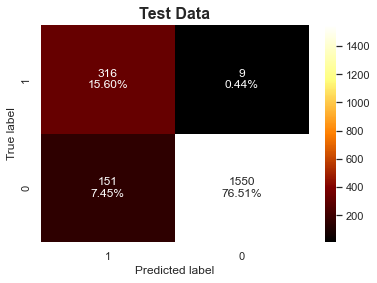

<IPython.core.display.Javascript object>

In [ ]:
# Tuned XG Boost Model Scoring on TEST Data

xgb_tuned_test_score = model_scorings_on_test(xgb_tuned, "XGBoost Tuned Final")
xgb_tuned_test_score

<h2 style="color:green;"> Conclusion from Model Performance on Test Data</h2>

<h6 style="color:DodgerBlue;">
* RandomizedSearch Tuned XGBoost model performed extremely well on the Unseen Test Data.
</h6>

<h6 style="color:DodgerBlue;">
* Only 9 out of 2026 records are predicted incorrectly which is just 0.44% are False Negatives.
</h6>

<h6 style="color:DodgerBlue;">    
* Produced a very high Recall of 97%.
</h6>

<h6 style="color:DodgerBlue;">    
* 7.45% records are False Positives where our ML Algorithm predicted that these Customers will attrite but they didn't at the end.
</h6>

<h6 style="color:DodgerBlue;">    
* We will go ahead and Productinize this Model using a Pipeline
</h6>

## Productionize the model

###  Pipelines for productionizing the model 

- Pipeline is a way of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated. 



- Now, we have a final model. let's use pipelines to put the model into production

###   Column Transformer 



* We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns




* Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.




* We will create 2 different pipelines, one for numerical columns and one for categorical columns. For numerical columns, we will do missing value imputation as pre-processing. For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

* Using SimpleImputer for Numerical data and SimpleImputer + OnehotEncoder for Categorical Data


* We have to complete some data Preprocessing to convert Character data into Numeric before coming here

In [ ]:
# creating a list of numerical variables
numerical_features = df.select_dtypes(include="number").columns.tolist()

numerical_features.remove('Avg_Open_To_Buy')

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = df.select_dtypes(include="category").columns.tolist()

categorical_features.remove('Attrition_Flag')
categorical_features.remove('Age_bucket')

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [ ]:
# Separating target column

# Avg_Open_To_Buy is completely related to Credit_Limit. Hence dropping this column as it will not add
# any extra value


X = df.drop(["Age_bucket", "Attrition_Flag", "Avg_Open_To_Buy"], axis=1)
y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

**Now we already know the best model we need to process with, so we don't need to divide data into 3 sets - train, validation and test**

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


<IPython.core.display.Javascript object>

#### Creating a Pipeline with the Best Model and Preprocessor

In [ ]:
# Creating new pipeline with best parameters
model_pipe = Pipeline(steps=[("pre", preprocessor), ("XGB", xgb_tuned,),])


# Fit the model on training data
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Income_Category',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat',...
                               enable_categorical=False, eval_metric='logloss',
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=50, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=5, ...))])

<IPython.core.display.Javascript object>

In [ ]:
# transforming and predicting on test data

model_pipe.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>

### Actionable Insights & Recommendations

<h6 style="color:Blue;">
    
- Lower transcation count on credit card , less revolving balance , less transcational amount are an indication that customer will attrite. And this indicates --
    
    * Customer is not using this credit card , 
    * Bank should offer more rewards or cashback or some other offers to customer to attract.



- From EDA if customer hold **more product** with the bank he/she gets **less likely** to attrite.Bank can **offer more products** to such customers so they buy more products which will help retain such customers



- Customers who have been **inactive for a month** show high chances of attrition.Bank should focus on such customers as well.



- Avg utilization ratio is lower amongst attrited customers.



- Customers in 

    * Age range 36-55 ,
    * who were doctorate or postgraduate ,
    * or Female attrited more. 
  
  One of the reasons can be some competitive bank is offering them better deals leading to lesser user of this banks credit card.




- Customers who have **more communication with the bank** in the last 12 months have **attrited**. 
This needs to be investigated whether there were any issues of customers which were not resolved leading into customer leaving the bank.